In [1]:
import pandas as pd
# load the dataset
df = pd.read_csv("../data/online_shoppers_intention.csv")

In [2]:
print(df.shape)
df.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [4]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print(df[col].describe())
    print()

Administrative
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

Administrative_Duration
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.2

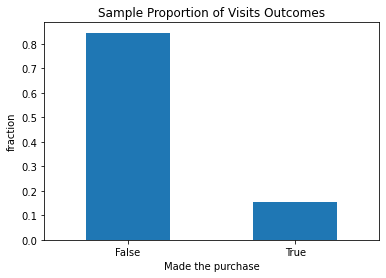

purchased count: 1908
not purchased count: 10422


In [5]:
# Visualize target variable 
import matplotlib
from matplotlib import pylab as plt
pd.value_counts(df["Revenue"],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.xlabel('Made the purchase')
plt.xticks(rotation=360)
plt.title("Sample Proportion of Visits Outcomes")
plt.savefig("../figures/1column/Revenue", dpi = 300)
plt.show()
print("purchased count:",sum(df["Revenue"]==True))
print("not purchased count:", sum(df["Revenue"]==False))


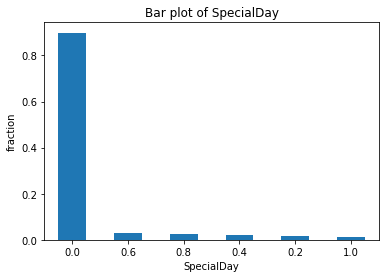

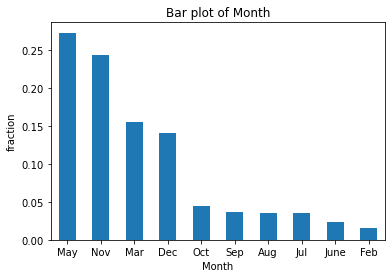

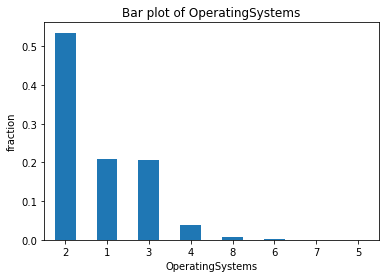

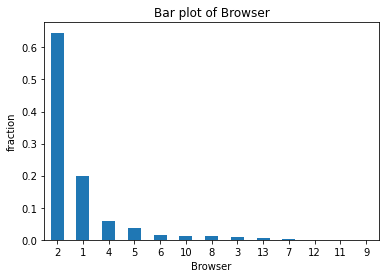

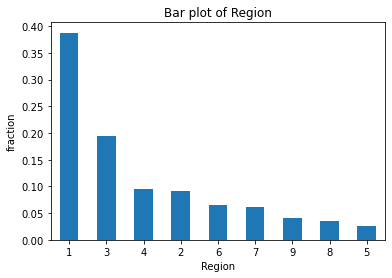

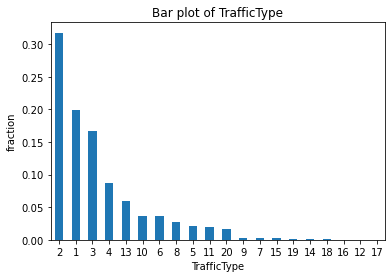

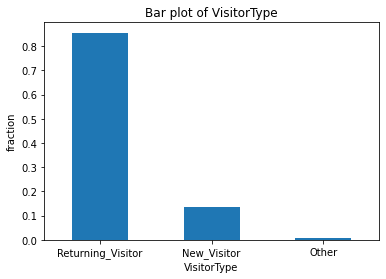

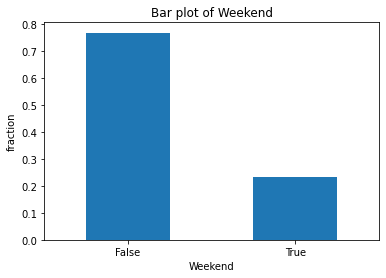

In [6]:
# visualize categorical variable 
for col in df.columns[9:-1]:
    pd.value_counts(df[col],normalize=True).plot.bar()
    plt.ylabel('fraction')
    plt.xlabel(col)
    plt.xticks(rotation=360)
    title = "Bar plot of "+col
    plt.title(title)
    plt.savefig("../figures/1column/"+col, dpi = 300)
    plt.show()

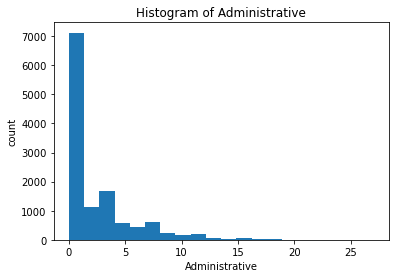

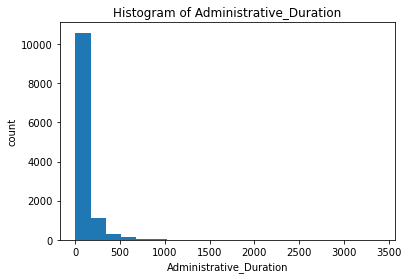

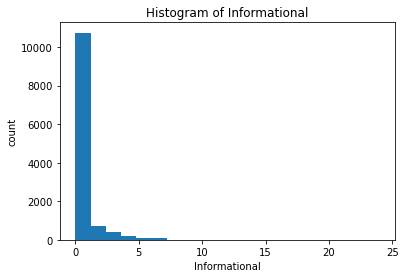

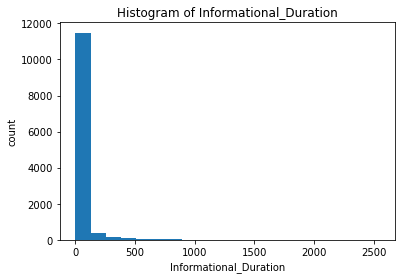

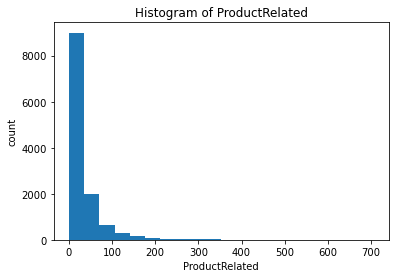

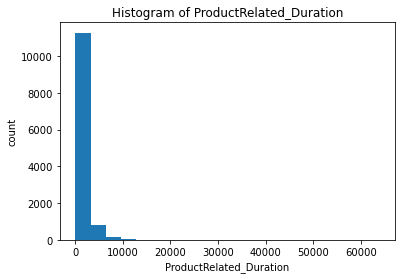

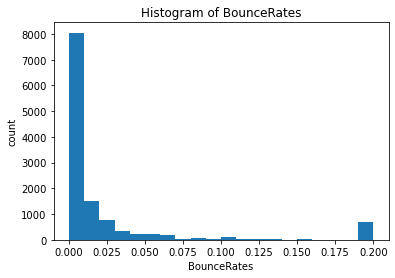

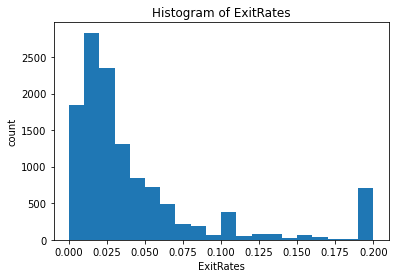

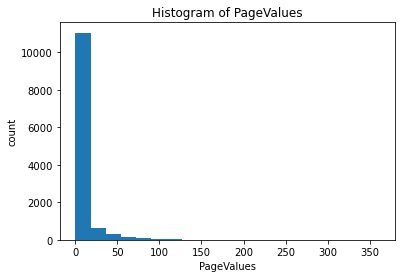

In [7]:
# visualize continuous variables 
for col in df.columns[0:9]:
    df[col].plot.hist(bins = 20)
    plt.ylabel('count')
    plt.xlabel(col)
    plt.xticks(rotation=360)
    title = "Histogram of "+col
    plt.title(title)
    plt.savefig("../figures/1column/"+col, dpi = 300)
    plt.show()

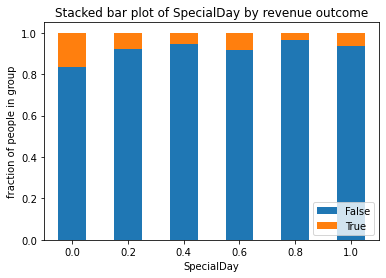

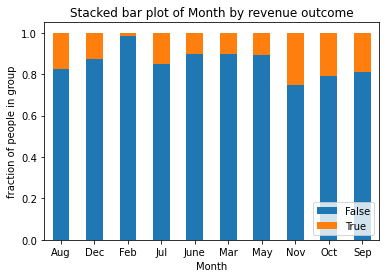

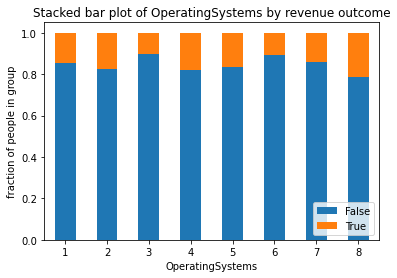

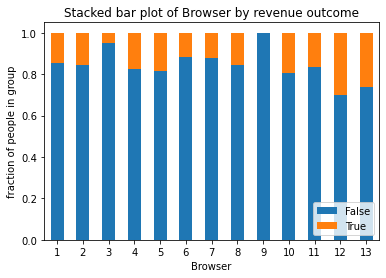

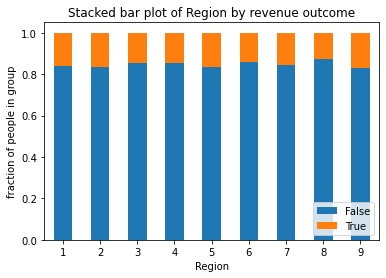

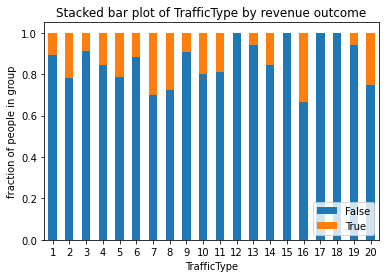

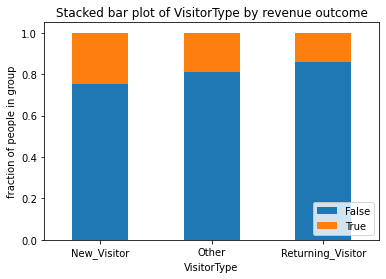

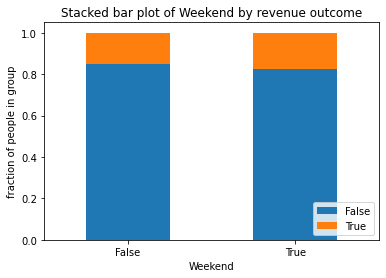

In [8]:

# plot categorical columns vs. target
for col in df.columns[9:-1]:
    count_matrix = df.groupby([col, "Revenue"]).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('fraction of people in group')
    plt.xticks(rotation=360)
    title = "Stacked bar plot of "+col+" by revenue outcome"
    plt.title(title)
    plt.savefig("../figures/2columns/"+title, dpi = 300)
    plt.legend(loc=4)


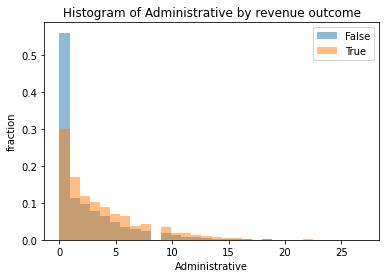

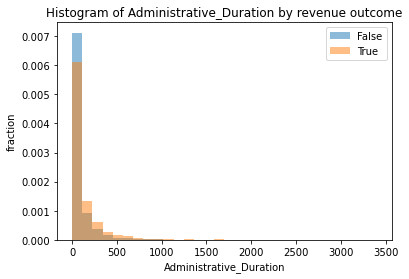

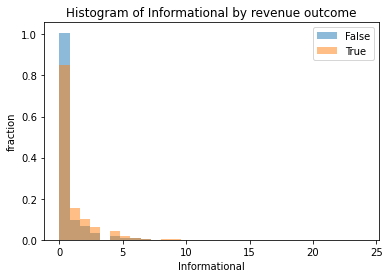

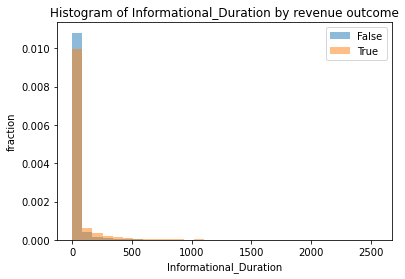

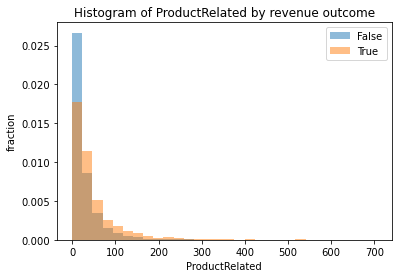

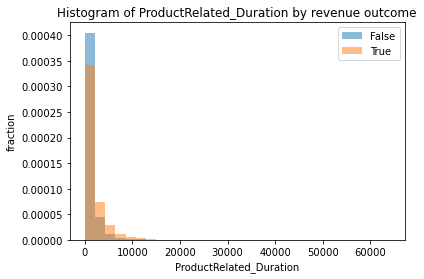

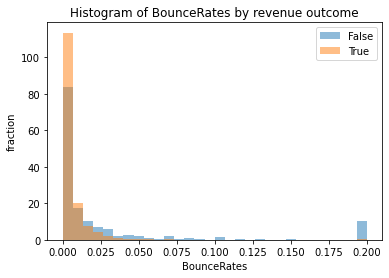

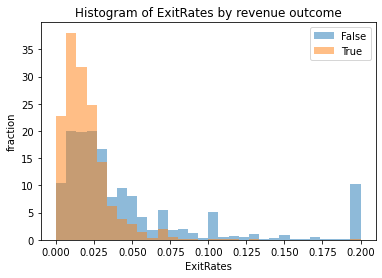

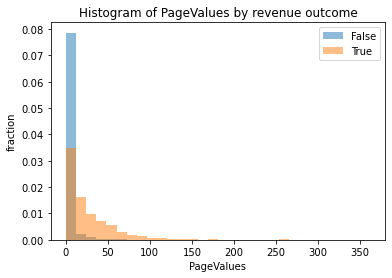

In [9]:
categories = df["Revenue"].unique()
# plot continuous columns vs. target
for col in df.columns[0:9]:
    for c in categories:
        bin_range = (df[col].min(),df[col].max())
        plt.hist(df[df["Revenue"]==c][col], alpha=0.5,label=c,range=bin_range,bins=30,density=True)
    plt.legend()
    title = "Histogram of "+col+" by revenue outcome"
    plt.title(title)
    plt.ylabel('fraction')
    plt.xlabel(col)
    plt.savefig("../figures/2columns/"+title, dpi = 300)
    plt.show()

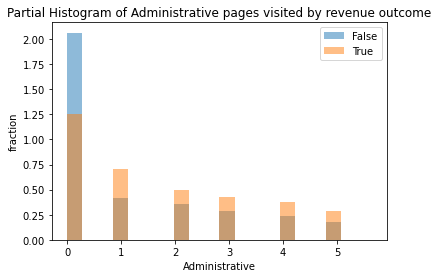

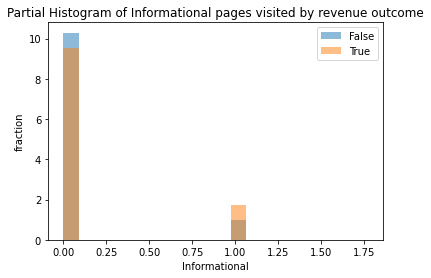

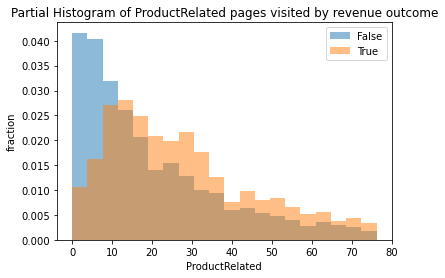

In [10]:
categories = df["Revenue"].unique()
# partial histograms for pages visited 
    
for col in ["Administrative", "Informational","ProductRelated"]: 
    for c in categories:
        bin_range = (df[col].min(),df[col].mean()+df[col].std())
        plt.hist(df[df["Revenue"]==c][col], alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    plt.ylabel('fraction')
    plt.xlabel(col)
    title = "Partial Histogram of "+col+" pages visited by revenue outcome"
    plt.title(title)
    plt.savefig("../figures/2columns/"+title, dpi = 300)
    plt.show()

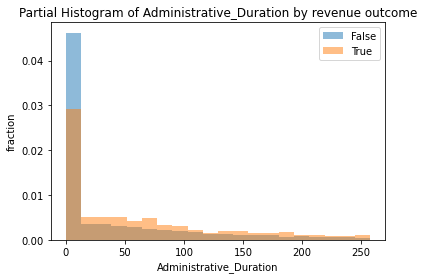

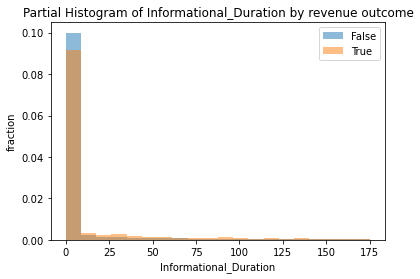

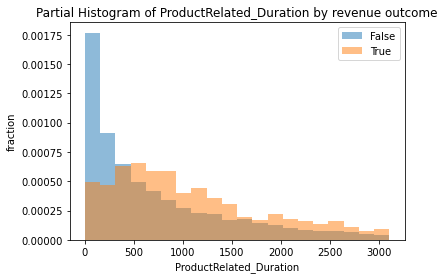

In [11]:
# partial histograms for durations 
for col in ["Administrative_Duration", "Informational_Duration","ProductRelated_Duration"]: 
    for c in categories:
        bin_range = (df[col].min(),df[col].mean()+df[col].std())
        plt.hist(df[df["Revenue"]==c][col], alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend()
    plt.ylabel('fraction')
    plt.xlabel(col)
    title = "Partial Histogram of "+col+" by revenue outcome"
    plt.title(title)
    plt.savefig("../figures/2columns/"+title, dpi = 300)
    plt.show()

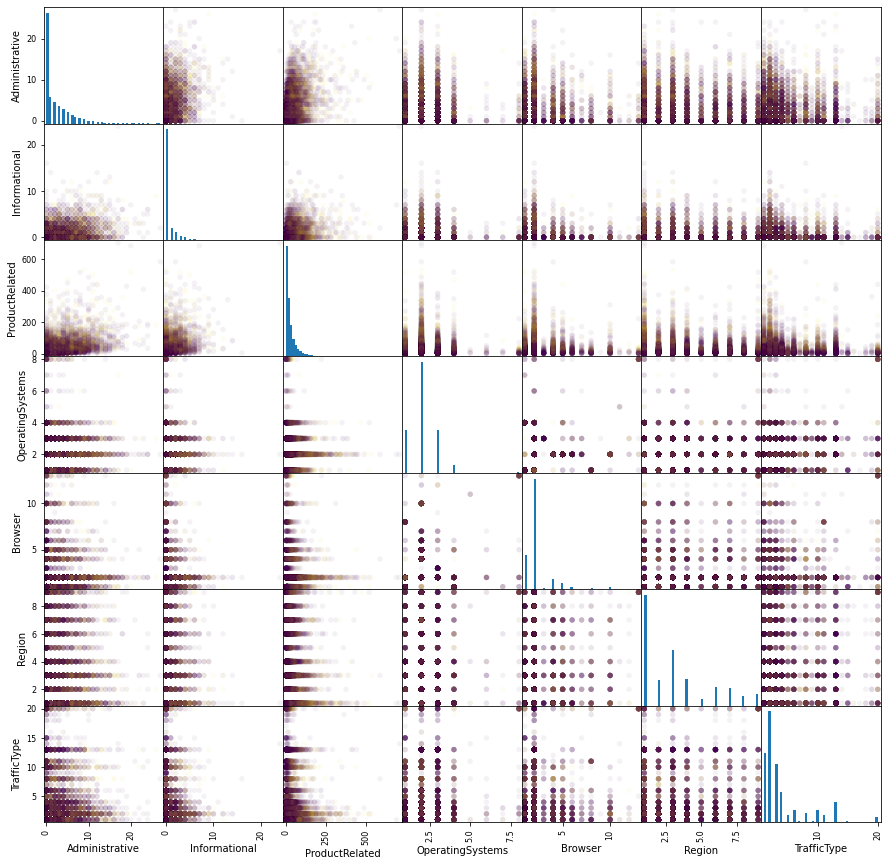

In [12]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(15, 15),c = pd.get_dummies(df['Revenue']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.05)
plt.savefig("../figures/scatter_matrix")
plt.show()

In [13]:
#separate the feature matrix X, and target variable y
X = df.loc[:, df.columns != 'Revenue']
y = df['Revenue']

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

# categorical variables
onehot_ftrs = ['SpecialDay', 'Month','OperatingSystems',
               'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend']
# continuous variables
std_ftrs = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']
# collect all the encoders
preprocessor = ColumnTransformer(transformers = [
    ("onehot",OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
    ("std", StandardScaler(),std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])

random_state = 42 
# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)


# do StratifiedKFold split on other

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
print(X_train_prep.shape)

    
    

(7892, 79)


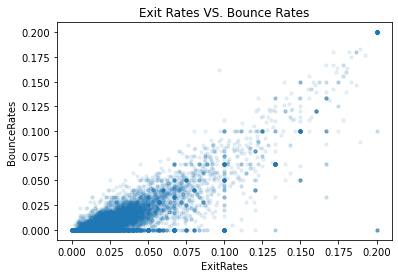

In [15]:
df.plot.scatter('ExitRates','BounceRates',alpha=0.1,s=10) 
title = "Exit Rates VS. Bounce Rates"
plt.title(title)
plt.savefig("../figures/Exit_vs_Bounce", dpi = 300)
plt.show()

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
import xgboost
from sklearn.ensemble import RandomForestClassifier

# build a pipeline
def MLpipe_KFold(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The f1 is minimized in cross-validation.
    '''
    nr_states = 5
    test_scores = np.zeros(nr_states)
    accuracy = np.zeros(nr_states)
    best_models = []
    for i in range(nr_states):
        #split the data to other and test
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=42*i)

        # splitter for other
        # do StratifiedKFold split on other

        kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
        # specify random states for random forest.
        if ML_algo == RandomForestClassifier():
            ML_algo = RandomForestClassifier(random_state = 42*i)
        elif ML_algo == xgboost.XGBClassifier():
            ML_algo = xgboost.XGBClassifier(random_state = 42*i)
        # let's put together a pipeline
        # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
        # then it will train the ML algorithm on the training set and evaluate it on the validation set
        # it repeats this step automatically such that each fold will be an evaluation set once
        pipe = make_pipeline(preprocessor, ML_algo)

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        # use the negative of RMSE, because the scoring follow the convention that higher return values are better than lower return values
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'f1',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)

        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        # save results into a data frame. print it and inspect it
        results = pd.DataFrame(grid.cv_results_)
        #print(results)
        # print the best parameters for tuning 
        print('best model parameters:',grid.best_params_)
        # print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        # save the model
        best_models.append(grid)
        # calculate and save the test RMSE score
        y_test_pred = best_models[-1].predict(X_test)
        
        test_scores[i] = f1_score(y_test,y_test_pred)
        accuracy[i]=accuracy_score(y_test,y_test_pred)
        print('f1 score:',test_scores[i])
        print('accuracy:',accuracy[i])
   
    return best_models, test_scores, accuracy, X_test, y_test

results = np.zeros(5)
stds = np.zeros(5)


In [19]:
# Logistic regression with L2 regularization
# initialize logistic regression
import pickle
from sklearn.linear_model import LogisticRegression

log_reg_l2 = LogisticRegression(penalty='l2', max_iter = 100000, random_state = 10)

param_grid = {
    'logisticregression__C': np.logspace(-2,4,7)
}

best_models, test_scores, accuracy, X_test, y_test = MLpipe_KFold(X, y, preprocessor = preprocessor, ML_algo = log_reg_l2, param_grid = param_grid)

# uncertainty in the model
mean = np.mean(test_scores)
std = np.std(test_scores)
print('mean test f1 scores:', mean)
print('test scores standard deviation:', std)

# save the results and uncertainty of the model
results[0] = mean
stds[0]=std

file = open('../results/l2.save', 'wb')
pickle.dump((best_models, X_test, y_test),file)
file.close()


Fitting 5 folds for each of 7 candidates, totalling 35 fits
best model parameters: {'logisticregression__C': 10.0}
f1 score: 0.4952380952380952
accuracy: 0.8710462287104623
Fitting 5 folds for each of 7 candidates, totalling 35 fits
best model parameters: {'logisticregression__C': 10.0}
f1 score: 0.47868852459016387
accuracy: 0.8710462287104623
Fitting 5 folds for each of 7 candidates, totalling 35 fits
best model parameters: {'logisticregression__C': 10.0}
f1 score: 0.5363489499192245
accuracy: 0.883617193836172
Fitting 5 folds for each of 7 candidates, totalling 35 fits
best model parameters: {'logisticregression__C': 100.0}
f1 score: 0.4899451553930531
accuracy: 0.8868613138686131
Fitting 5 folds for each of 7 candidates, totalling 35 fits
best model parameters: {'logisticregression__C': 1.0}
f1 score: 0.48613376835236544
accuracy: 0.8722627737226277
mean test f1 scores: 0.49727089869858043
test scores standard deviation: 0.02026935219460384


In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

param_grid = {
            'randomforestclassifier__max_depth': [3, 10, 30, 50, 79], # the max_depth should be smaller or equal than the number of features roughly
            'randomforestclassifier__max_features': [0.25, 0.5,0.75,1.0] # linearly spaced between 0.5 and 1
                } 
best_models, test_scores, accuracy, X_test, y_test = MLpipe_KFold(X, y, preprocessor = preprocessor, 
                                                ML_algo = RandomForestClassifier(), param_grid = param_grid)
# uncertainty in the model
mean = np.mean(test_scores)
std = np.std(test_scores)
print('mean test scores:', mean)
print('test scores standard deviation:', std)
# save the results and uncertainty of the model
results[1] = mean
stds[1]= std


Fitting 5 folds for each of 20 candidates, totalling 100 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.75}
f1 score: 0.6586985391766269
accuracy: 0.8957826439578265
Fitting 5 folds for each of 20 candidates, totalling 100 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
f1 score: 0.6566347469220246
accuracy: 0.8982157339821574
Fitting 5 folds for each of 20 candidates, totalling 100 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
f1 score: 0.6657458563535912
accuracy: 0.9018653690186537
Fitting 5 folds for each of 20 candidates, totalling 100 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.75}
f1 score: 0.668665667166417
accuracy: 0.9103811841038119
Fitting 5 folds for each of 20 candidates, totalling 100 fits
best model parame

In [21]:
file = open('../results/rf.save', 'wb')
pickle.dump((best_models,X_test, y_test),file)
file.close()

In [22]:
from sklearn.svm import SVC
# initialize SVC
svc = SVC()

# define param_grid
param_grid = {'svc__gamma': np.logspace(-2,1,4), 
              'svc__C': np.logspace(-2,1,4)
              } 
best_models, test_scores, accuracy, X_test, y_test = MLpipe_KFold(X, y, preprocessor = preprocessor, 
                                             ML_algo = svc, param_grid = param_grid)

# uncertainty in the model
mean = np.mean(test_scores)
std = np.std(test_scores)
print('mean test scores:', mean)
print('test scores standard deviation:', std)

# save the results and uncertainty of the model
results[2] = mean
stds[2]=std


file = open('../results/svc.save', 'wb')
pickle.dump((best_models,X_test, y_test),file)
file.close()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
f1 score: 0.5954415954415955
accuracy: 0.8848337388483374
Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
f1 score: 0.5667166416791605
accuracy: 0.8828061638280617
Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
f1 score: 0.6112759643916913
accuracy: 0.8937550689375506
Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
f1 score: 0.5822368421052632
accuracy: 0.8969991889699919
Fitting 5 folds for each of 16 candidates, totalling 80 fits
best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.1}
f1 score: 0.5878877400295421
accuracy: 0.8868613138686131
mean test scores: 0.5887117567294504
test scores standard deviation: 0.01470253587313392


In [23]:
from sklearn.neighbors import KNeighborsClassifier
# initialize knn
knn = KNeighborsClassifier()

# define param_grid
param_grid = {'kneighborsclassifier__n_neighbors': [1,10,20,30,40,50,60,70,100],
              'kneighborsclassifier__weights': ['uniform','distance']
              } 
best_models, test_scores, accuracy, X_test, y_test = MLpipe_KFold(X, y, preprocessor = preprocessor, 
                                             ML_algo = knn, param_grid = param_grid)
# uncertainty in the model
mean = np.mean(test_scores)
std = np.std(test_scores)
print('mean test scores:', mean)
print('test scores standard deviation:', std)

# save the results and uncertainty of the model
results[3] = mean
stds[3]=std


file = open('../results/knn.save', 'wb')
pickle.dump((best_models, X_test, y_test),file)
file.close()


Fitting 5 folds for each of 18 candidates, totalling 90 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}
f1 score: 0.44588045234248785
accuracy: 0.8609083536090836
Fitting 5 folds for each of 18 candidates, totalling 90 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}
f1 score: 0.48504983388704315
accuracy: 0.8742903487429035
Fitting 5 folds for each of 18 candidates, totalling 90 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}
f1 score: 0.5301587301587302
accuracy: 0.8799675587996756
Fitting 5 folds for each of 18 candidates, totalling 90 fits
best model parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}
f1 score: 0.4788732394366198
accuracy: 0.8799675587996756
Fitting 5 folds for each of 18 candidates, totalling 90 fits
best model parameters

In [24]:
# XGBoost
import xgboost
XGB = xgboost.XGBClassifier(learning_rate=0.03, n_estimators = 10000, seed = 0,use_label_encoder=False)
param_grid = {
              #"reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              #"reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "xgbclassifier__max_depth": [1,10,30,50],
              "xgbclassifier__colsample_bytree": [0.9],              
              "xgbclassifier__subsample": [0.66]}

best_models, test_scores, accuracy, X_test, y_test = MLpipe_KFold(X, y, preprocessor = preprocessor, 
                                             ML_algo = XGB, param_grid = param_grid)

# uncertainty in the model
mean = np.mean(test_scores)
std = np.std(test_scores)
print('mean test scores:', mean)
print('test scores standard deviation:', std)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[05:07:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:09:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:11:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:22:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Ex

[08:14:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best model parameters: {'xgbclassifier__colsample_bytree': 0.9, 'xgbclassifier__max_depth': 50, 'xgbclassifier__subsample': 0.66}
f1 score: 0.6369047619047619
accuracy: 0.9010543390105434
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[06:42:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:44:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavi

IndexError: index 5 is out of bounds for axis 0 with size 5

In [26]:
# save the results and uncertainty of the model
results[4] = mean
stds[4]=std


file = open('../results/xgboost.save', 'wb')
pickle.dump((best_models, X_test, y_test),file)
file.close()


In [32]:
# baseline f1 score 
# predict all as False
y_pred = np.zeros(12330)
baseline_f1 = f1_score(y,y_pred)
print('baseline f1',baseline_f1)

baseline f1 0.0


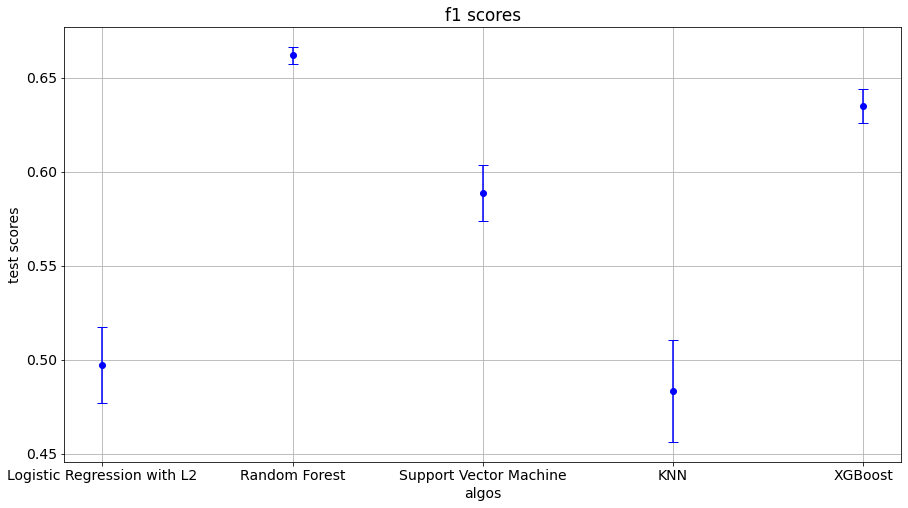

In [33]:
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 14})
label = ["Logistic Regression with L2","Random Forest", "Support Vector Machine", "KNN","XGBoost"]
plt.errorbar(label, results, yerr = stds, fmt = 'bo', capsize = 5)
plt.title("f1 scores")
plt.xlabel("algos")
plt.ylabel("test scores")
plt.grid()
plt.savefig("../figures/results", dpi = 300)
plt.show()

In [34]:
file = open('../results/rf.save', 'rb')
best_models, X_test, y_test = pickle.load(file)
file.close()
np.random.seed(42)
ftr_names = X.columns
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])
grid = best_models[-1]
test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))



ftr_names = X.columns
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.6603518267929636
test baseline =  0.8333333333333334
shuffling Administrative
   shuffled test score: 0.669 +/- 0.003
shuffling Administrative_Duration
   shuffled test score: 0.665 +/- 0.004
shuffling Informational
   shuffled test score: 0.662 +/- 0.001
shuffling Informational_Duration
   shuffled test score: 0.657 +/- 0.001
shuffling ProductRelated
   shuffled test score: 0.661 +/- 0.006
shuffling ProductRelated_Duration
   shuffled test score: 0.65 +/- 0.004
shuffling BounceRates
   shuffled test score: 0.631 +/- 0.007
shuffling ExitRates
   shuffled test score: 0.597 +/- 0.012
shuffling PageValues
   shuffled test score: 0.176 +/- 0.012
shuffling SpecialDay
   shuffled test score: 0.66 +/- 0.002
shuffling Month
   shuffled test score: 0.609 +/- 0.006
shuffling OperatingSystems
   shuffled test score: 0.663 +/- 0.002
shuffling Browser
   shuffled test score: 0.66 +/- 0.002
shuffling Region
   shuffled test score: 0.66 +/- 0.002
shuffling TrafficType
   shuffled test

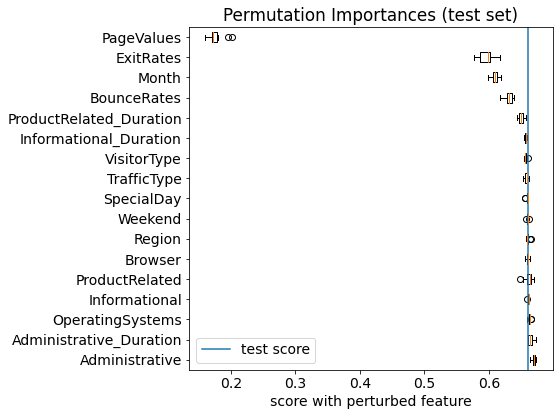

In [35]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
nr_states = 25

def RF_pipeline(X,y,nr_states):
    
    all_f1 = np.zeros(nr_states)
    all_accuracy = np.zeros(nr_states)
    all_baseline_accuracy = np.zeros(nr_states)
    models = []
    X_tests = []
    y_tests = []
    
    for i in range(nr_states):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42*i)

        X_train = clf.fit_transform(X_train)
        X_test = clf.transform(X_test)
        
        X_tests.append(X_test)
        y_tests.append(y_test)
        
        feature_names = list(preprocessor.transformers_[0][1].get_feature_names(onehot_ftrs)) + \
                        preprocessor.transformers_[1][-1]
        # use the best parameters from gridsearchcv
        rf = RandomForestClassifier(max_depth = 10, max_features = 0.5, random_state=42*i)
    
        rf.fit(X_train, y_train)
    
        y_test_pred = rf.predict(X_test)
    
        all_f1[i] = f1_score(y_test,y_test_pred)
        all_accuracy[i]= accuracy_score(y_test,y_test_pred)
        all_baseline_accuracy[i] = accuracy_score(y_test,np.zeros(len(y_test)))
        models.append(rf)
        baselin_f1 = np.zeros(nr_states)
    return models, all_f1, all_accuracy, baseline_f1, all_baseline_accuracy, X_tests, y_tests, feature_names
models, all_f1, all_accuracy, baseline_f1, all_baseline_accuracy,X_tests, y_tests, feature_names = RF_pipeline(X,y,nr_states)



In [37]:
print('f1 score mean:',np.mean(all_f1), 'baseline f1 score:',0)
print('accuracy mean:',np.mean(all_accuracy),'baseline accuracy mean:',np.mean(all_baseline_accuracy))
print('accuracy std:',np.std(all_accuracy),'baseline accuracy std:',np.std(all_baseline_accuracy))


f1 score mean: 0.6572596276823797 baseline f1 score: 0
accuracy mean: 0.9034874290348743 baseline accuracy mean: 0.8438929440389294
accuracy std: 0.004918614501234808 baseline accuracy std: 0.006687413328870634


In [39]:

rf = models[-1]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
importances = pd.Series(importances, index = feature_names)
importance_std = pd.Series(std, index = feature_names)
forest_importances1 = pd.DataFrame({'feature_name': feature_names,'feature_importance':importances,'importance_std':importance_std})
forest_importances1.sort_values(by = 'feature_importance', axis=0, ascending=False, inplace=True)
forest_importances1

,feature_name,feature_importance,importance_std
PageValues,PageValues,0.520990,0.040387
ExitRates,ExitRates,0.070899,0.031096
ProductRelated_Duration,ProductRelated_Duration,0.061938,0.024771
ProductRelated,ProductRelated,0.055821,0.015646
BounceRates,BounceRates,0.051639,0.019911
...,...,...,...
OperatingSystems_5,OperatingSystems_5,0.000014,0.000104
TrafficType_15,TrafficType_15,0.000007,0.000070
TrafficType_19,TrafficType_19,0.000000,0.000000
TrafficType_18,TrafficType_18,0.000000,0.000000


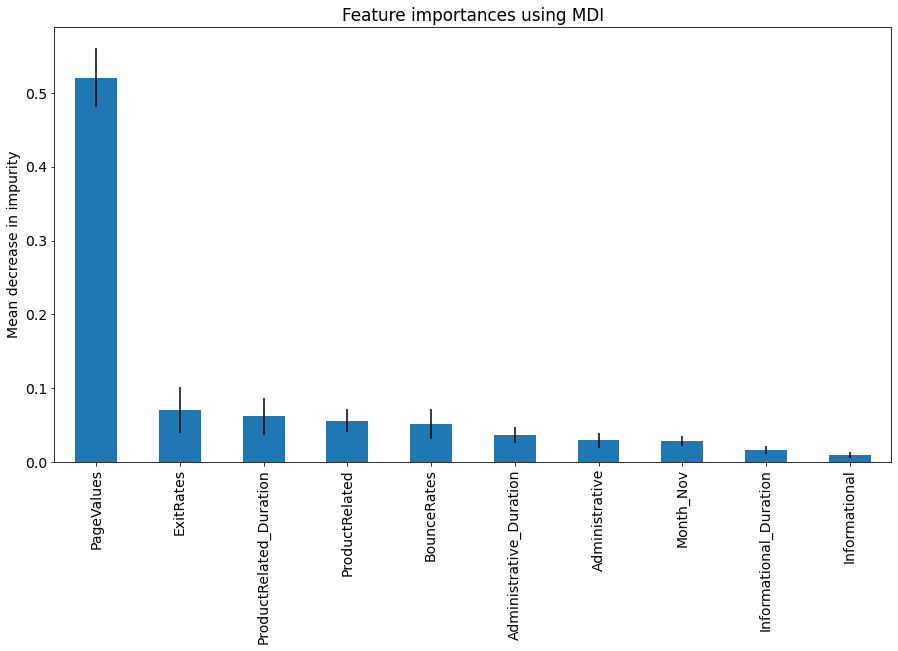

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
forest_importances1.iloc[0:10,1].plot.bar(yerr=forest_importances1.iloc[0:10,2], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.savefig("../figures/DMI", dpi = 300)
plt.show()

In [47]:
from sklearn.inspection import permutation_importance

rf = models[-1]
result = permutation_importance(rf, X_tests[-1], y_tests[-1], n_repeats=10, random_state=42, n_jobs=2)
feature_importance = pd.Series(result.importances_mean, index = feature_names)
importance_std = pd.Series(result.importances_std, index = feature_names)
forest_importances = pd.DataFrame({'feature_name': feature_names,'feature_importance':feature_importance,'importance_std':importance_std})


In [48]:
forest_importances.sort_values(by = 'feature_importance', axis=0, ascending=False, inplace=True)
forest_importances

,feature_name,feature_importance,importance_std
PageValues,PageValues,0.149189,0.005021
Month_Nov,Month_Nov,0.011517,0.002441
ExitRates,ExitRates,0.009246,0.002525
BounceRates,BounceRates,0.005312,0.000779
ProductRelated_Duration,ProductRelated_Duration,0.003690,0.002693
...,...,...,...
Region_3,Region_3,-0.000527,0.000575
Informational,Informational,-0.000568,0.000414
Informational_Duration,Informational_Duration,-0.001135,0.000827
Region_9,Region_9,-0.001217,0.000256


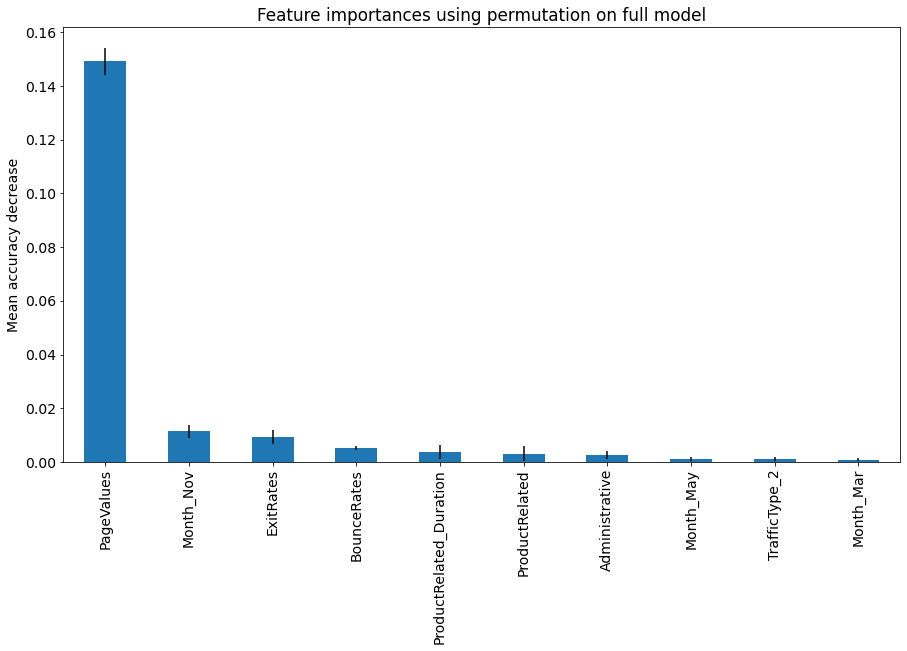

In [51]:

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
forest_importances.iloc[0:10,1].plot.bar(yerr=forest_importances.iloc[0:10,2], ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.savefig("../figures/permutation", dpi = 300)
plt.show()

In [57]:
import shap
#SHAP value
file = open('../results/rf.save', 'rb')
best_models, X_test, y_test = pickle.load(file)
file.close()


shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(best_models[-1].best_estimator_[1])
# transform the test set
X_test_transformed = best_models[-1].best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(2466, 79)
(2, 1000, 79)


SpecialDay_0_0
SpecialDay_0_2
SpecialDay_0_4
SpecialDay_0_6
SpecialDay_0_8
SpecialDay_1_0


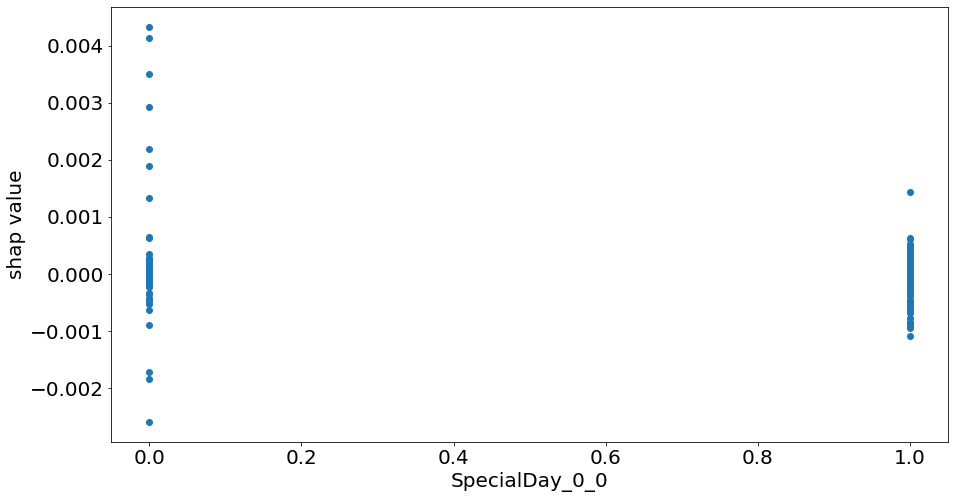

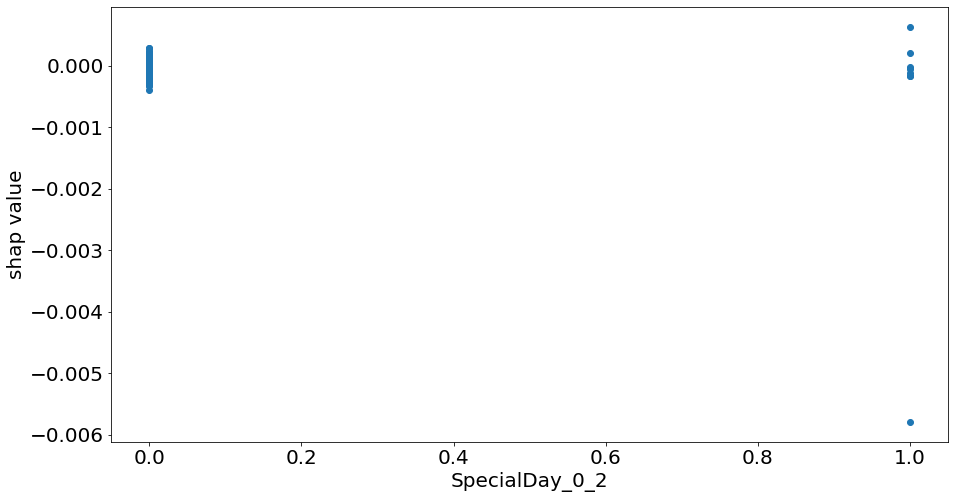

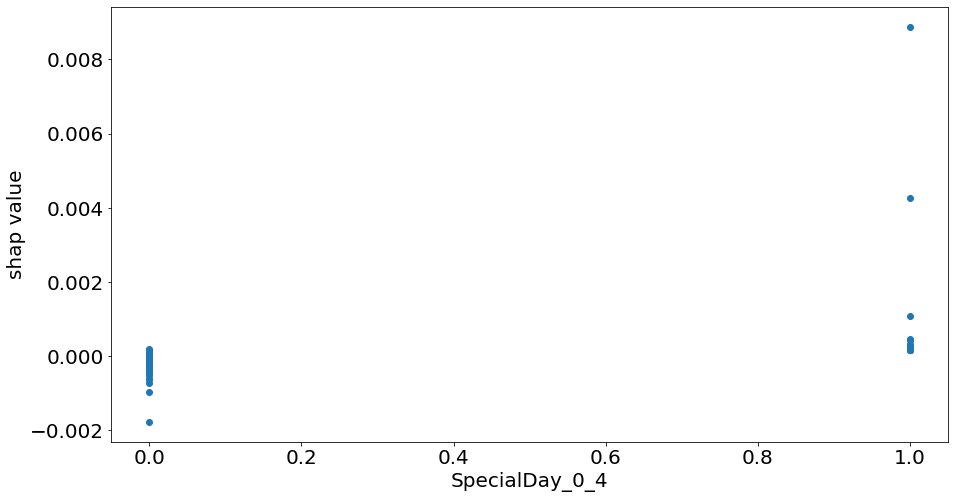

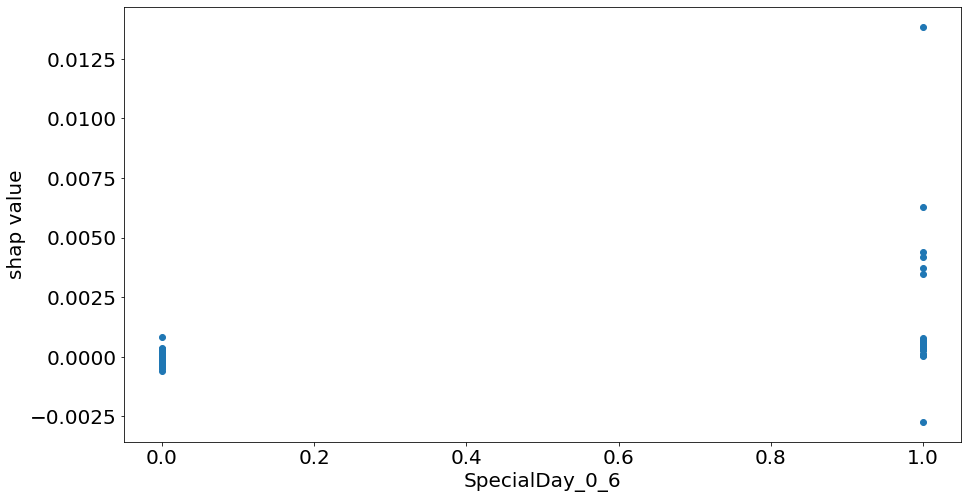

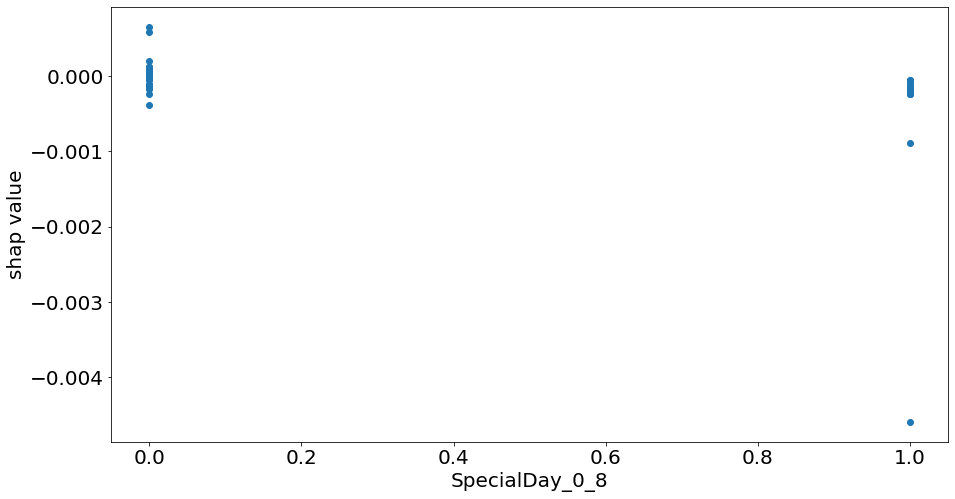

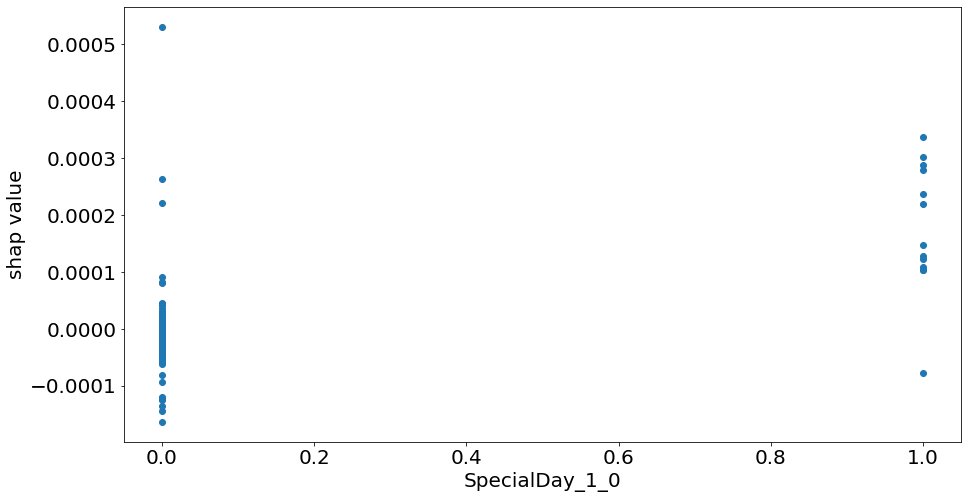

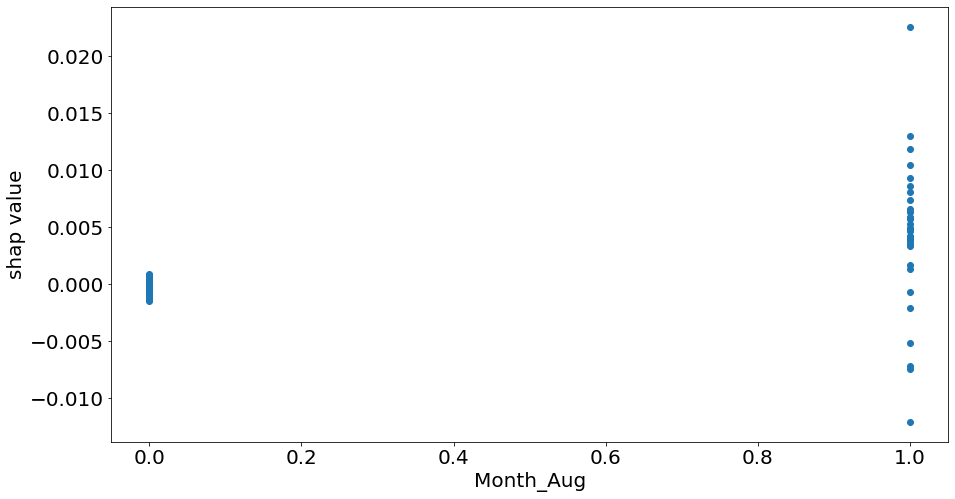

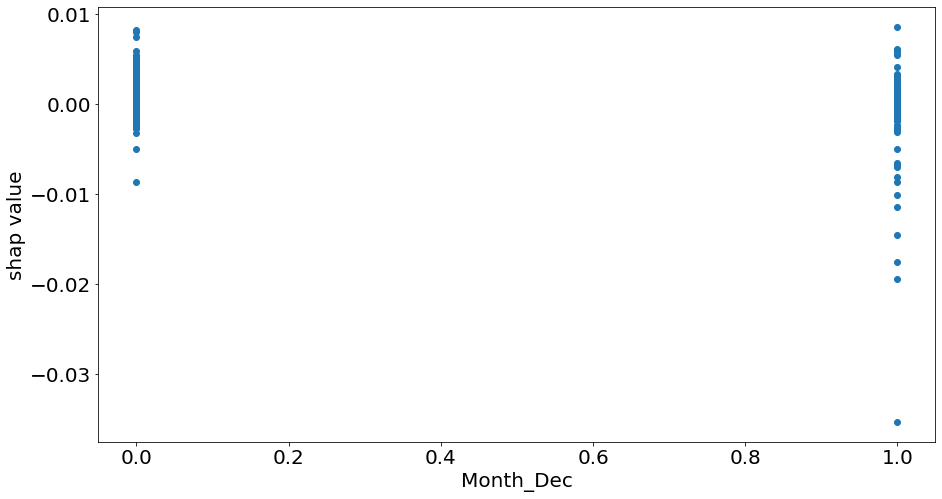

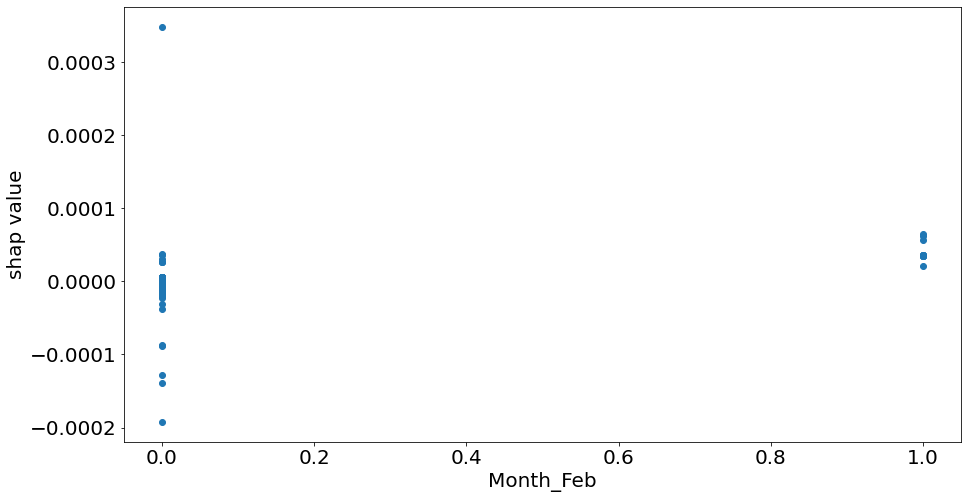

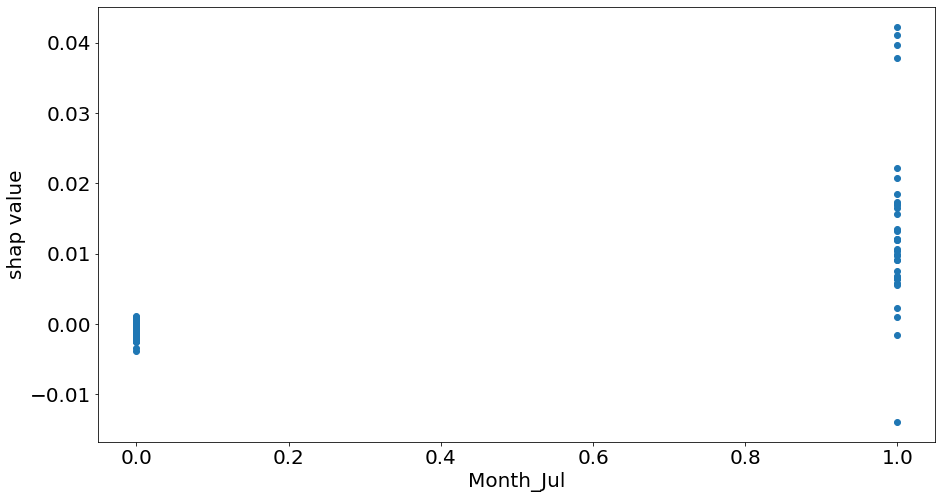

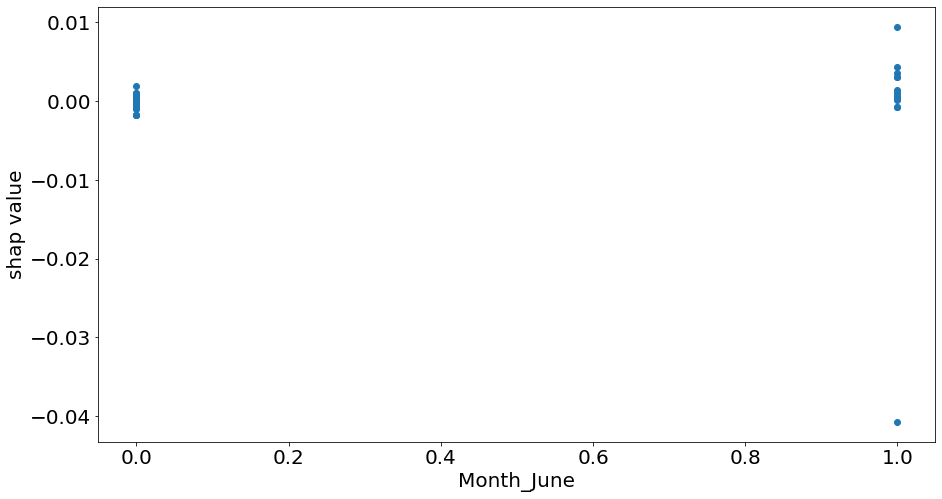

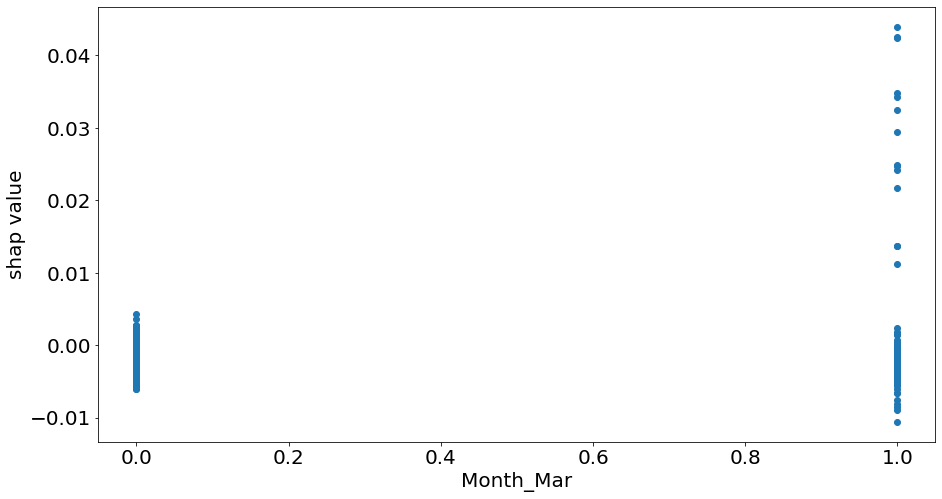

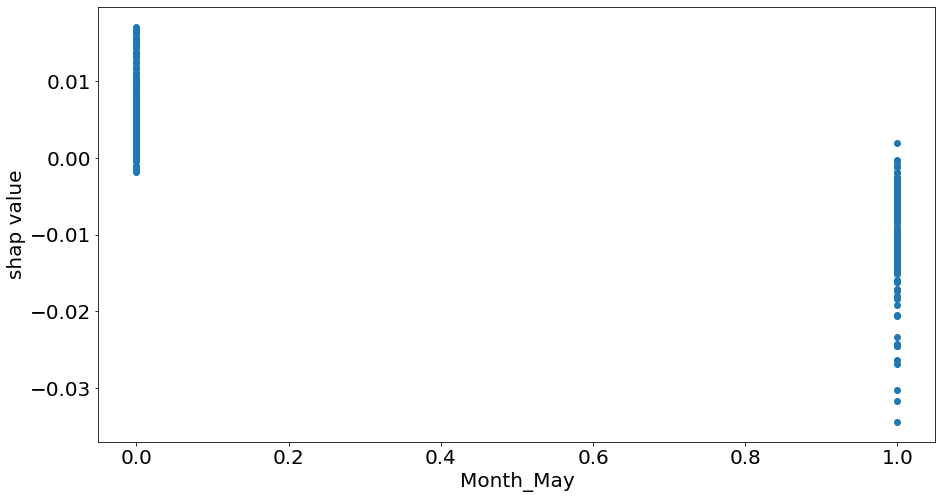

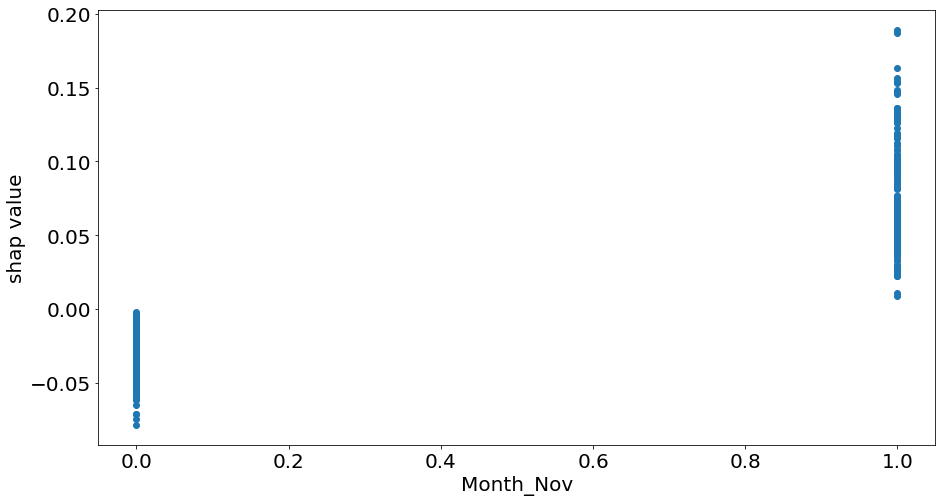

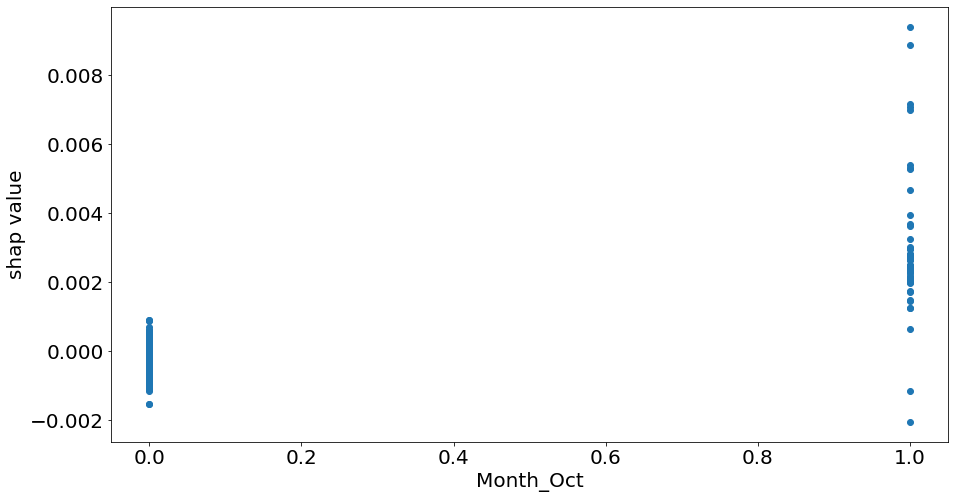

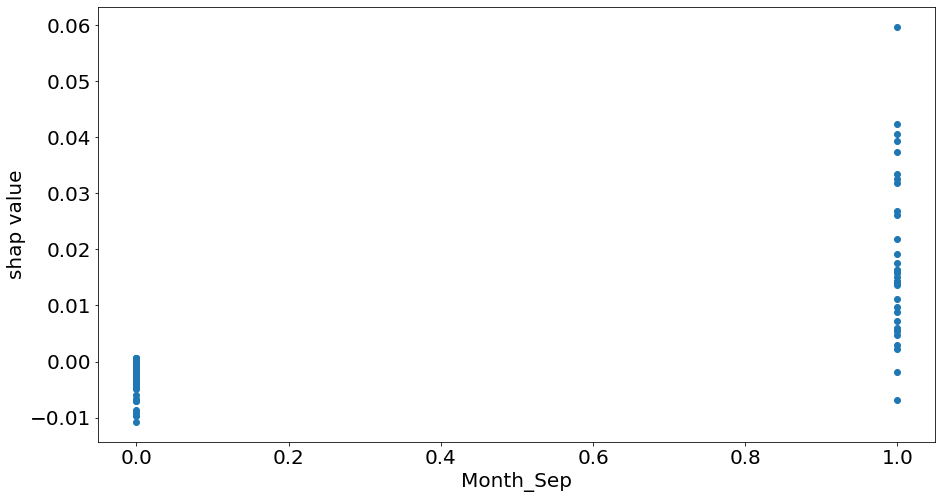

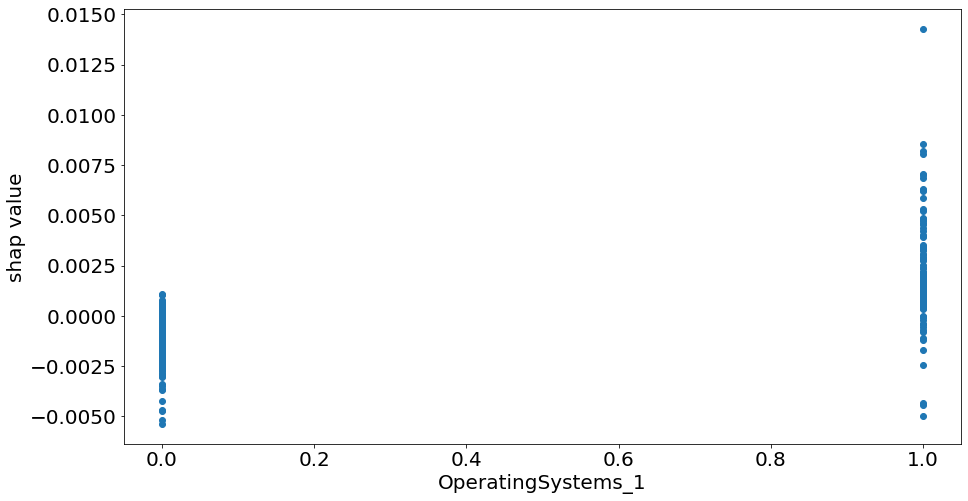

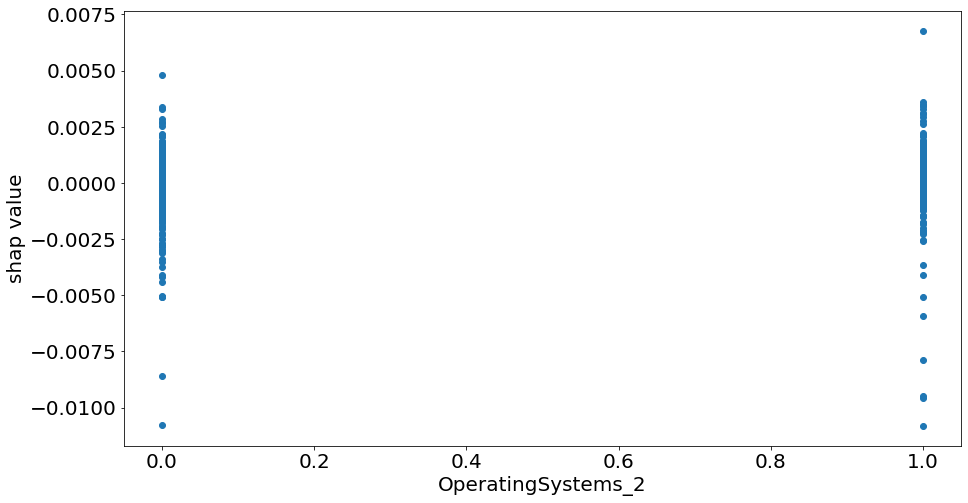

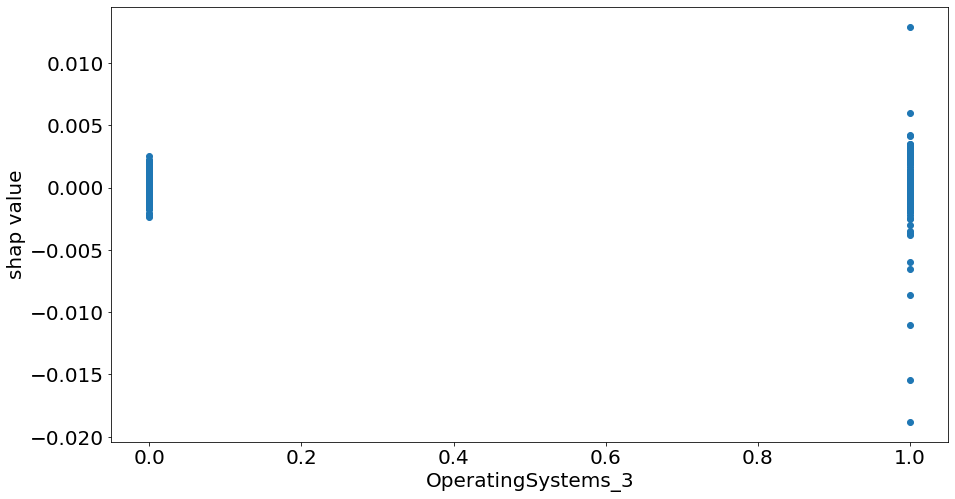

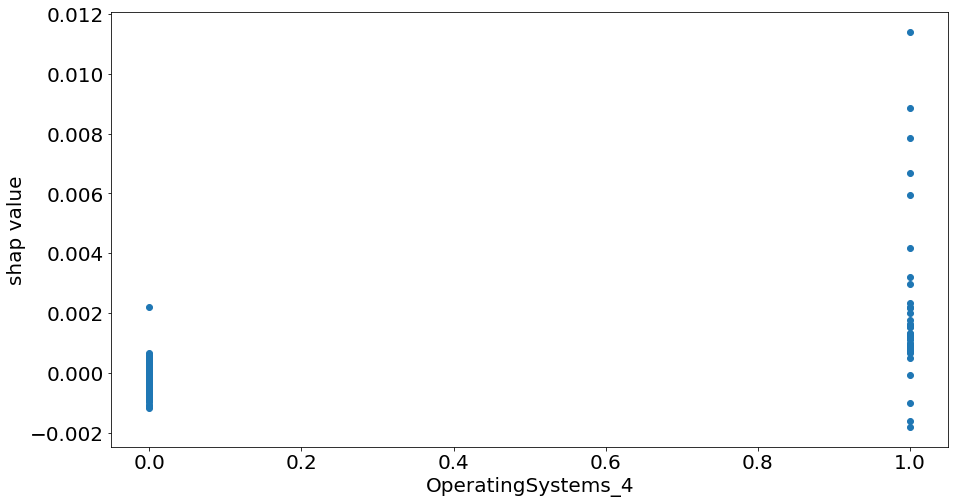

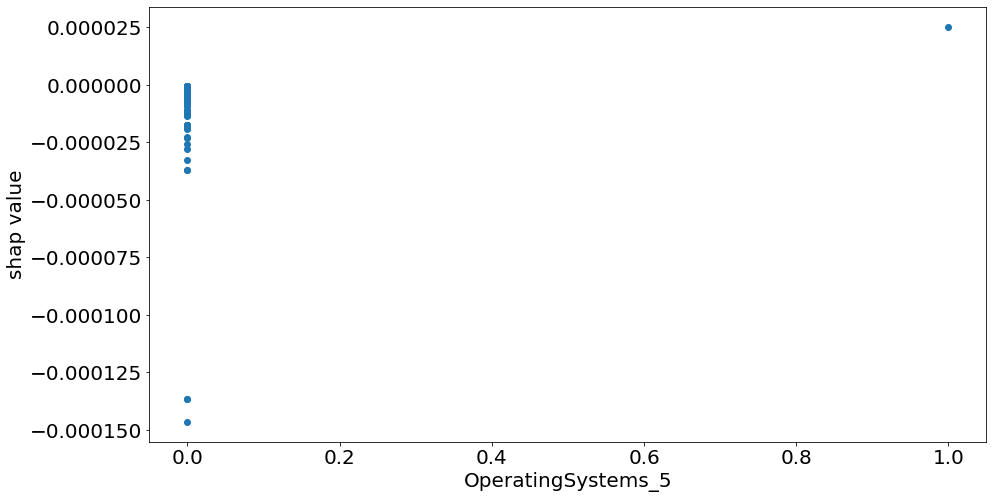

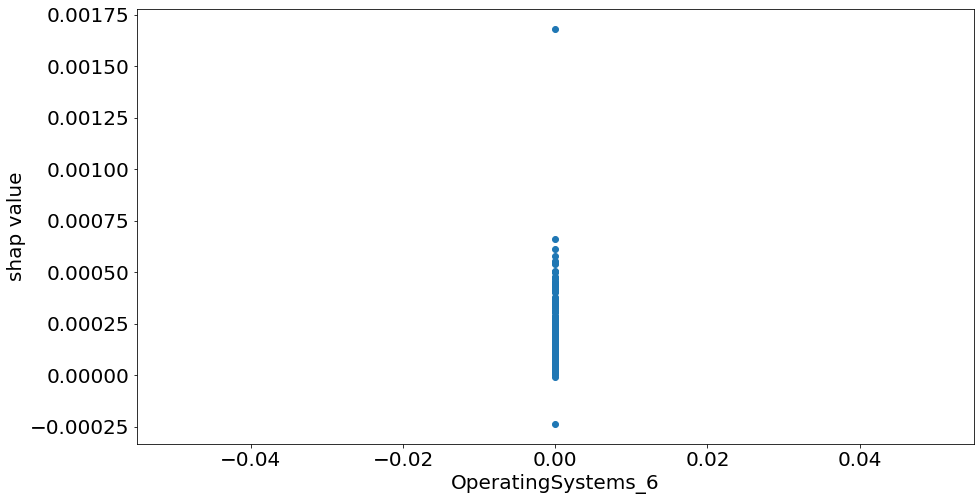

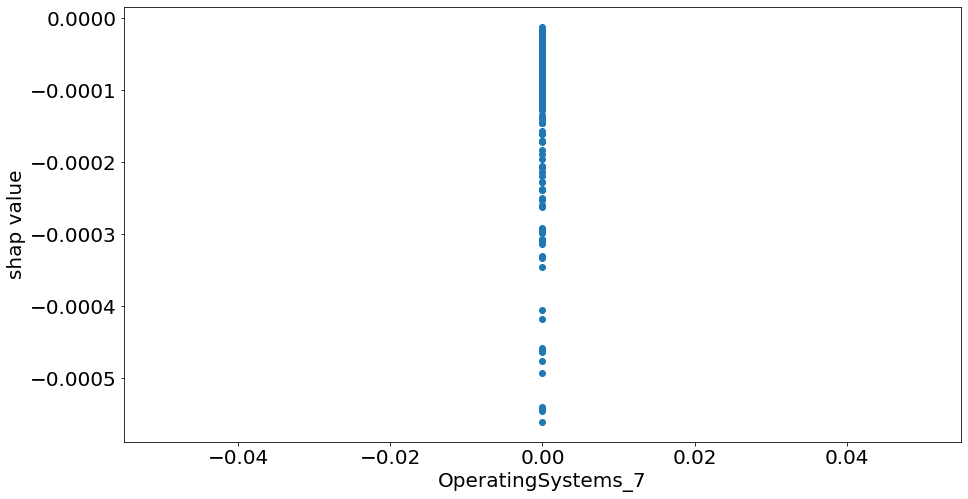

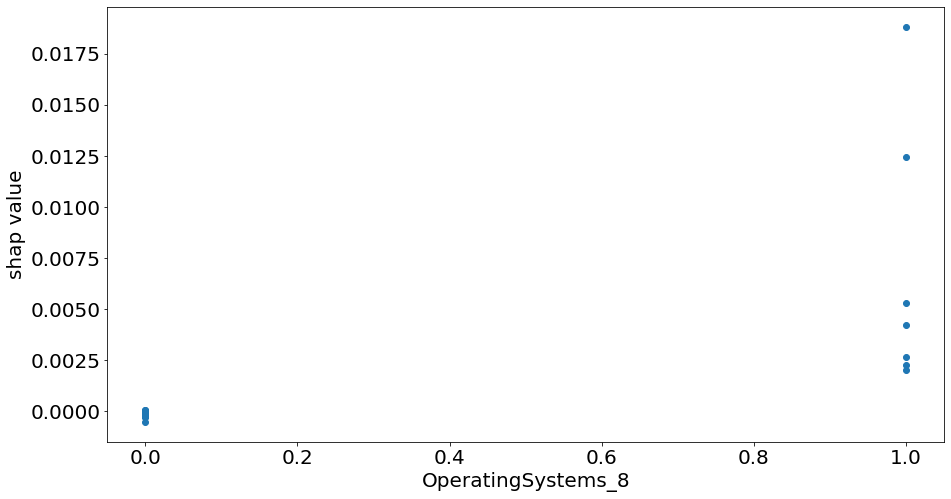

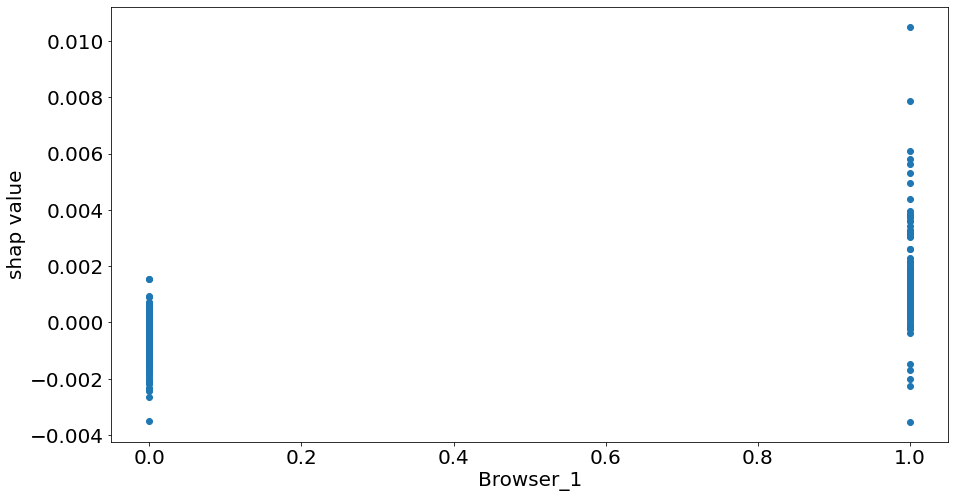

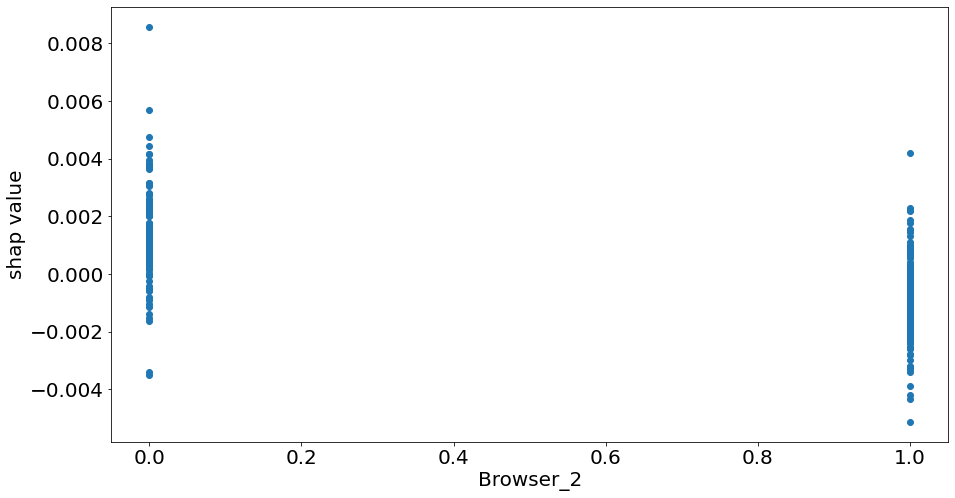

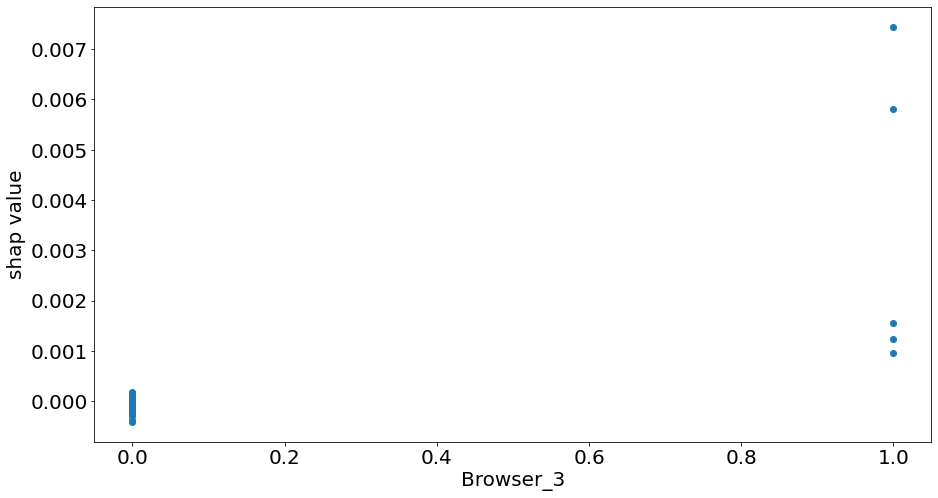

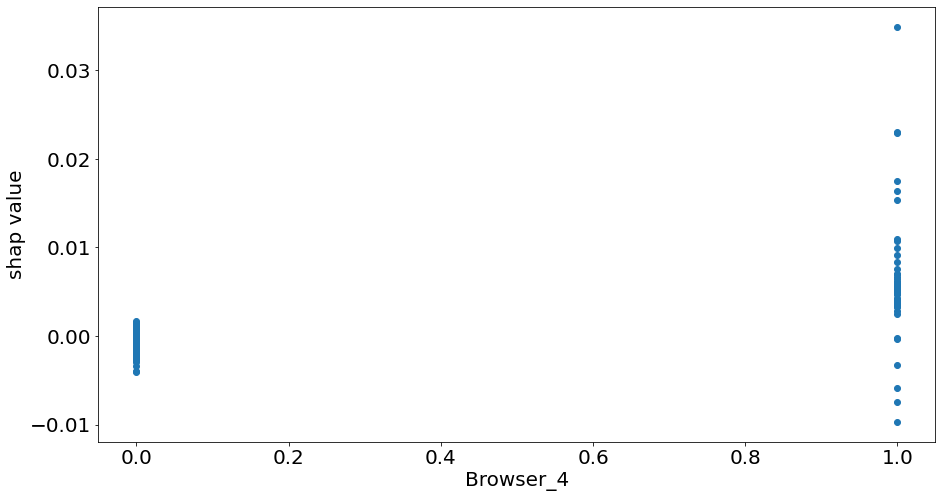

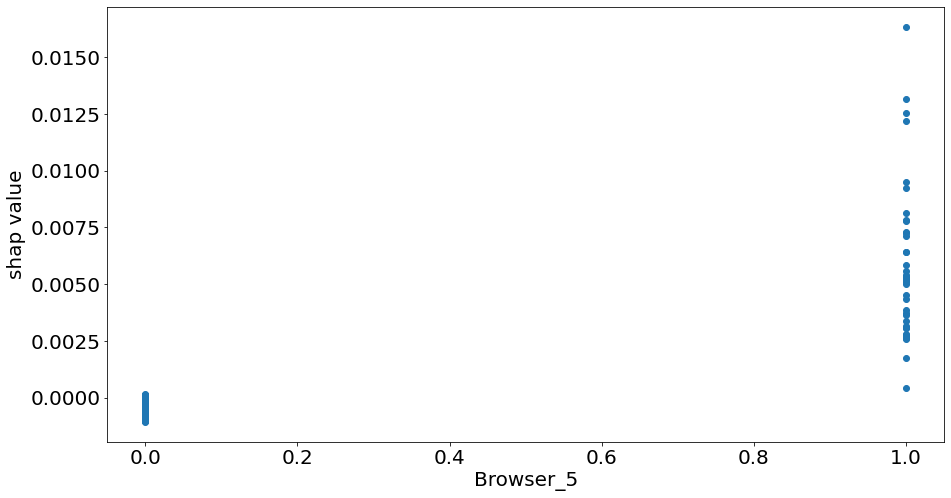

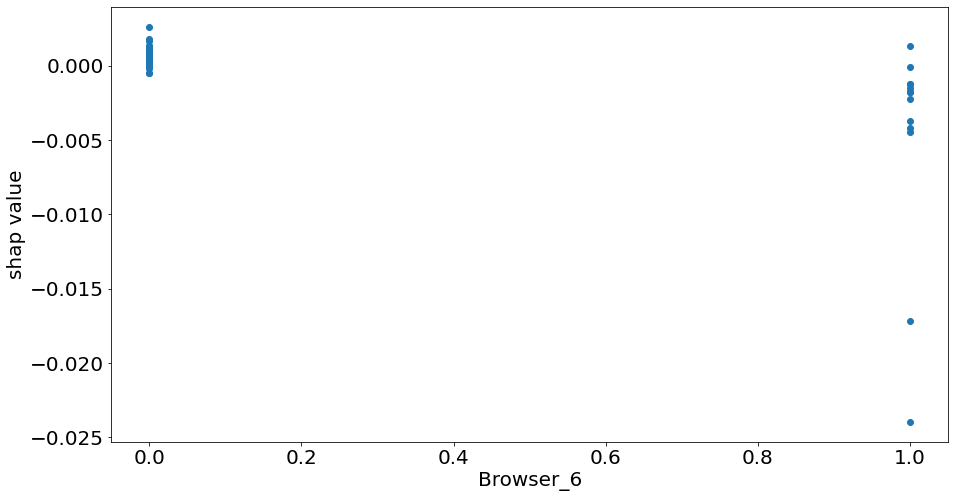

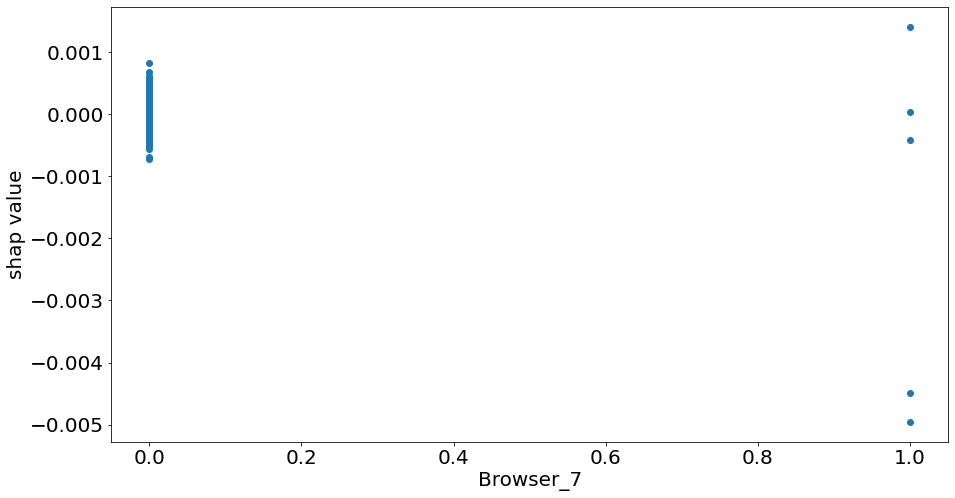

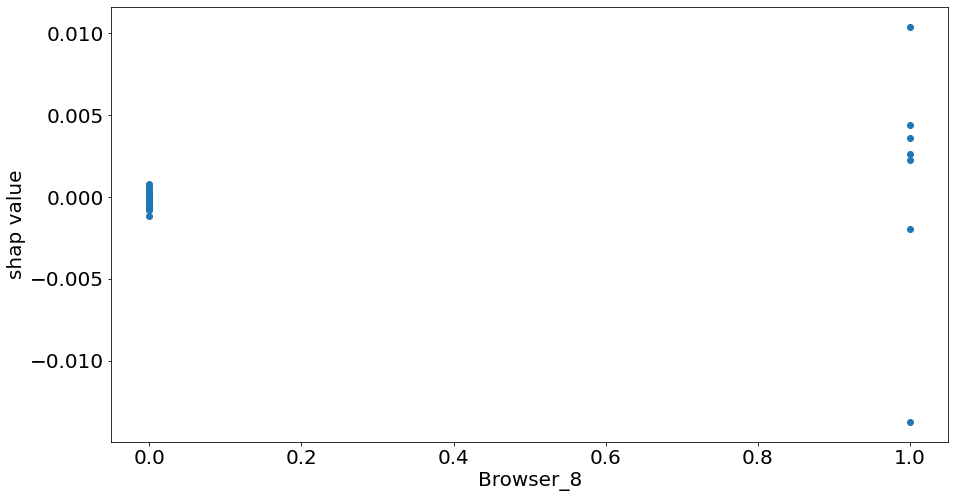

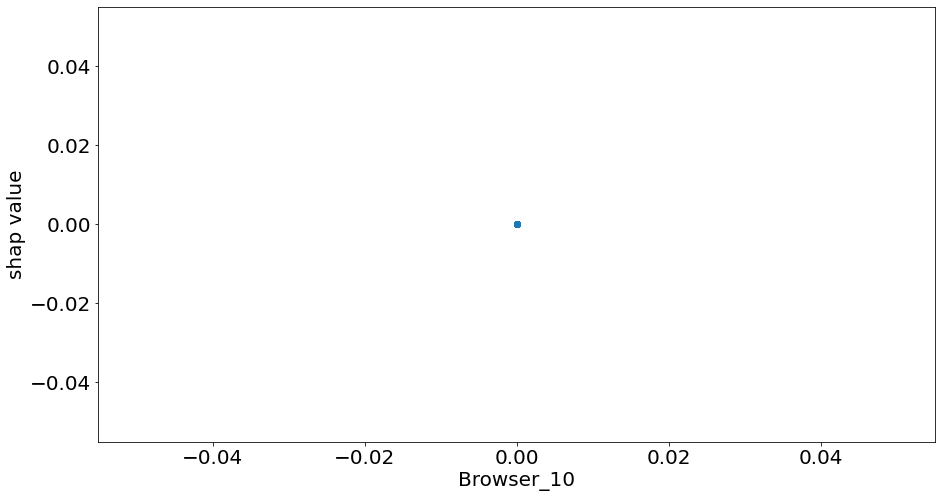

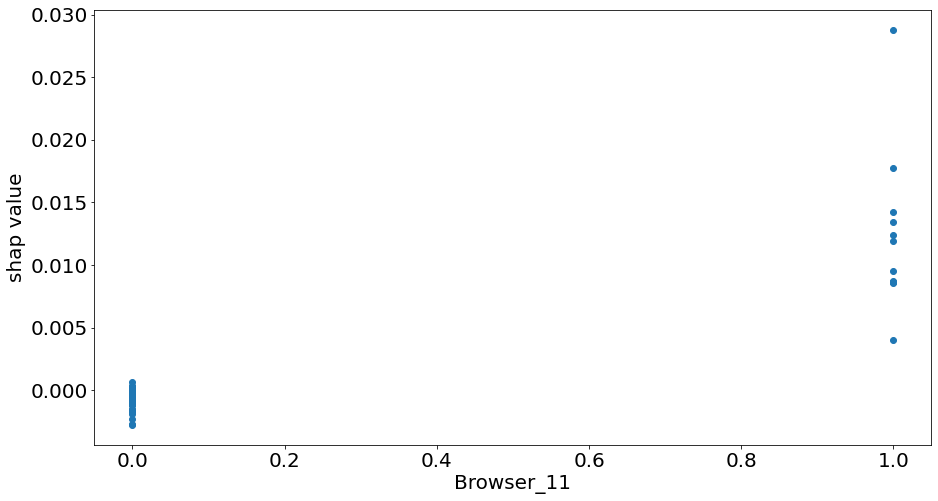

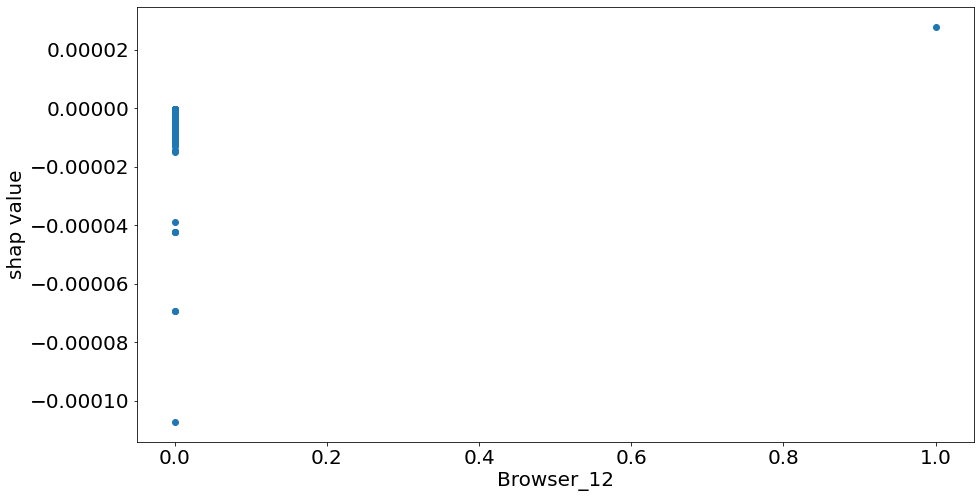

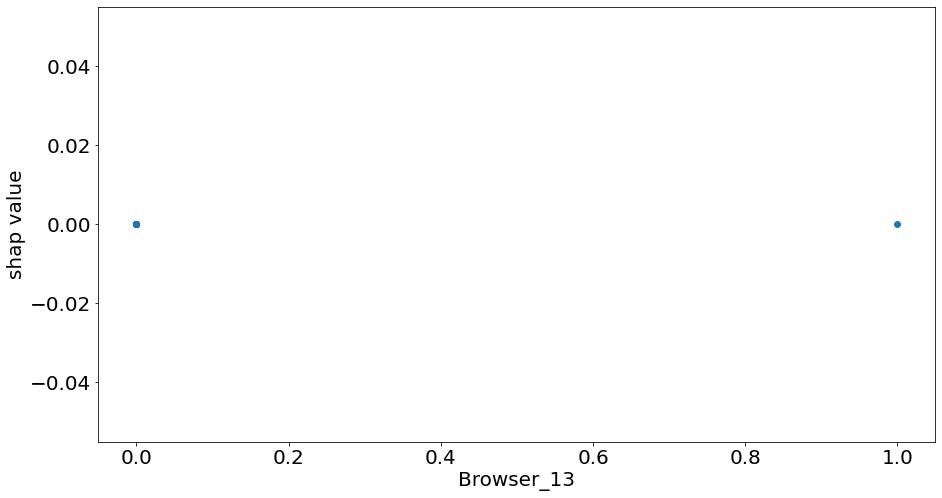

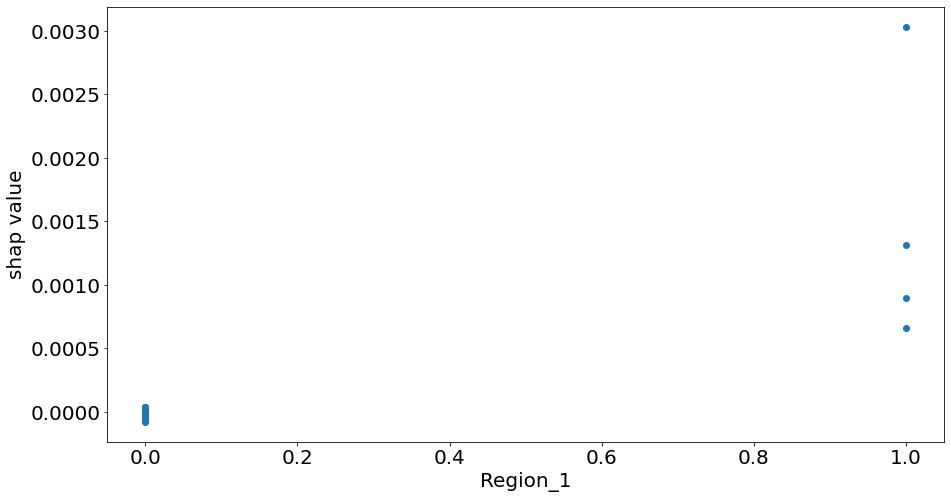

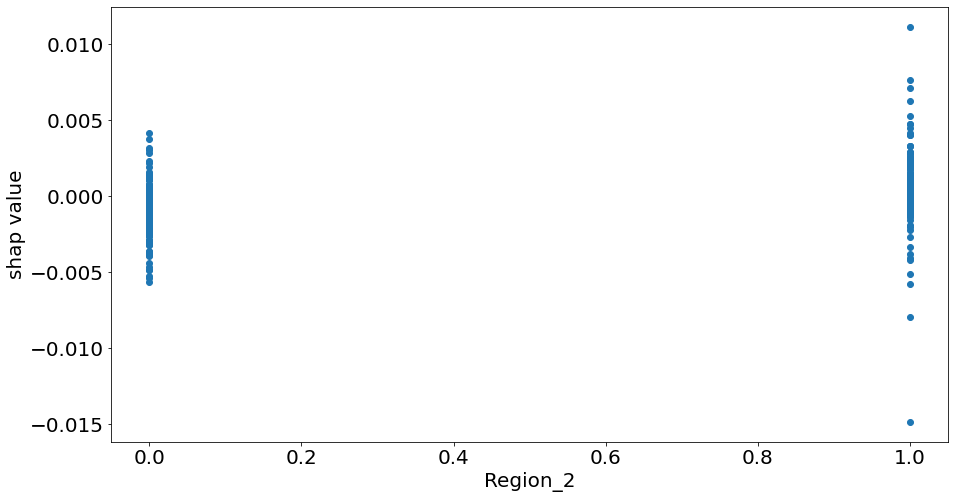

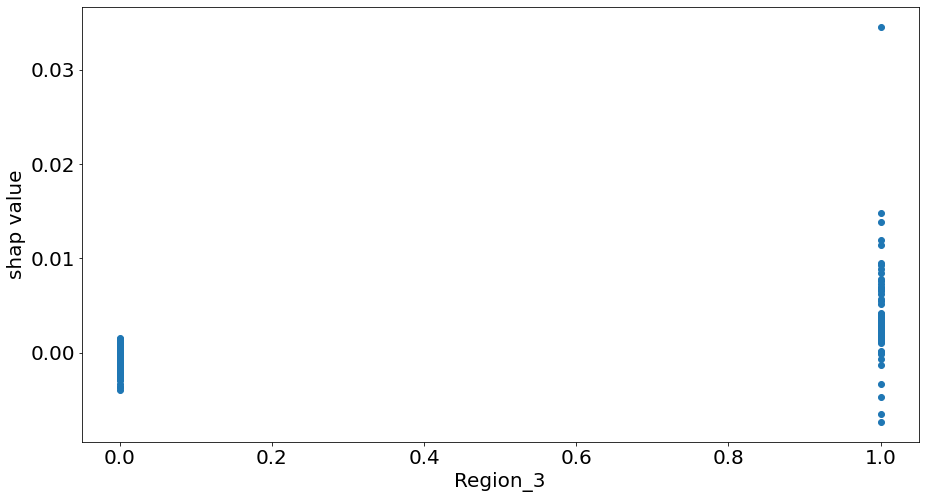

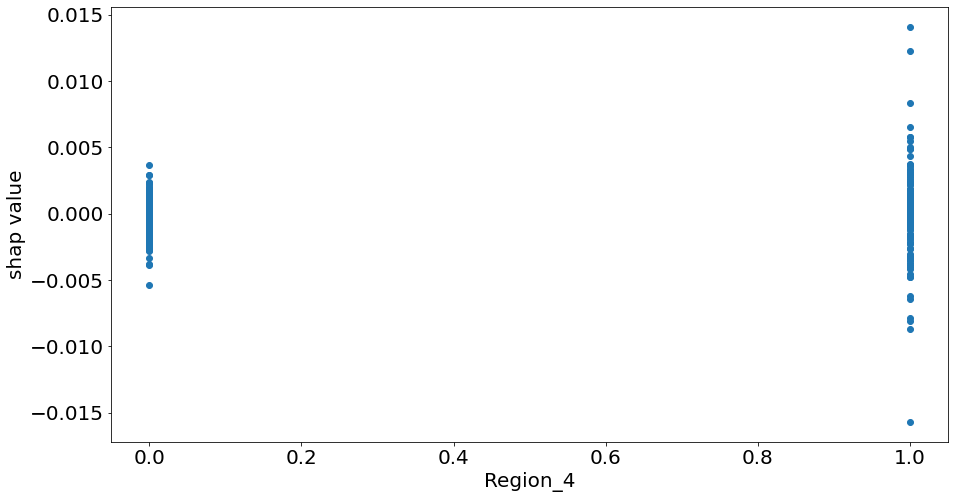

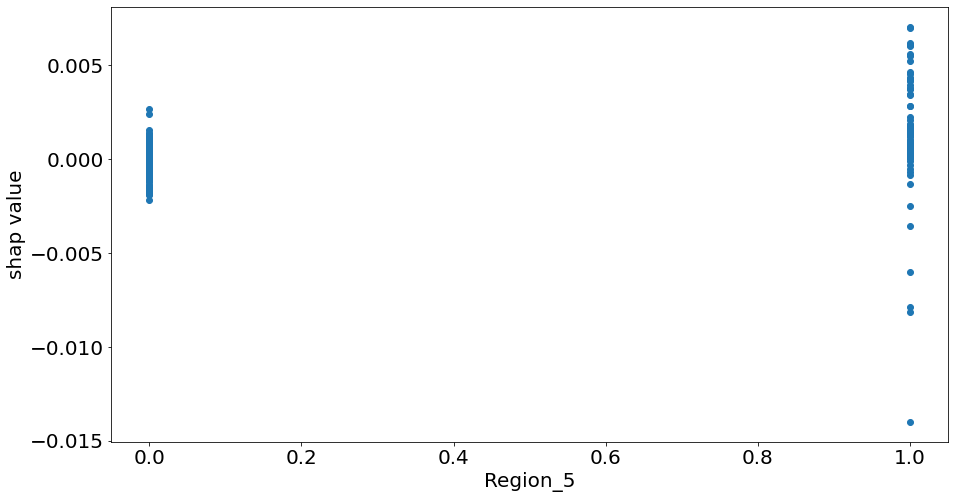

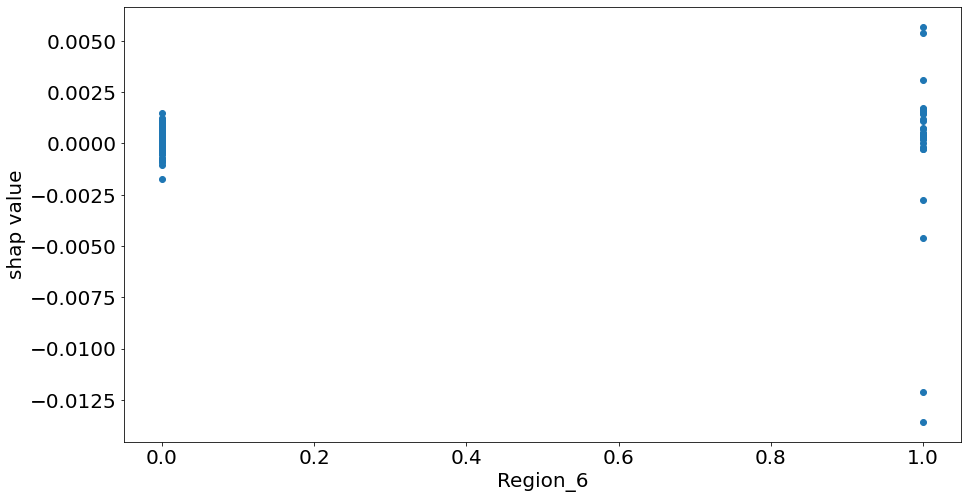

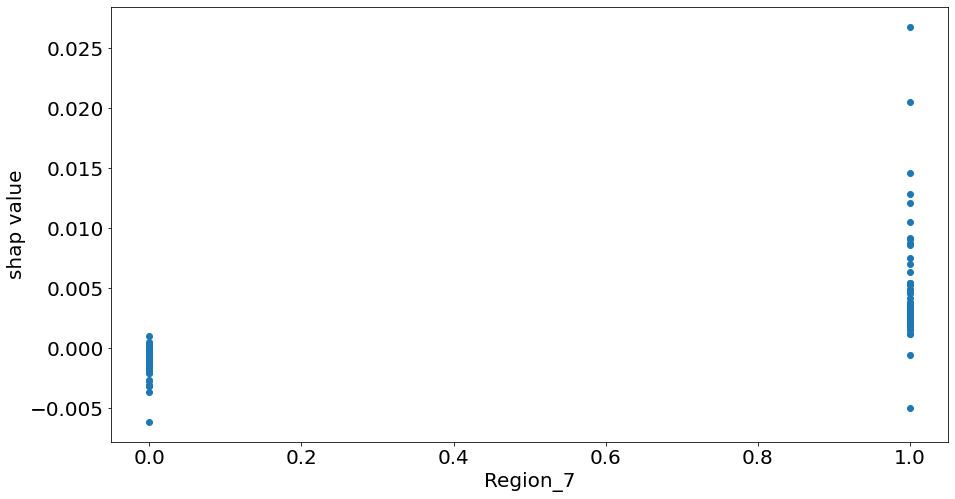

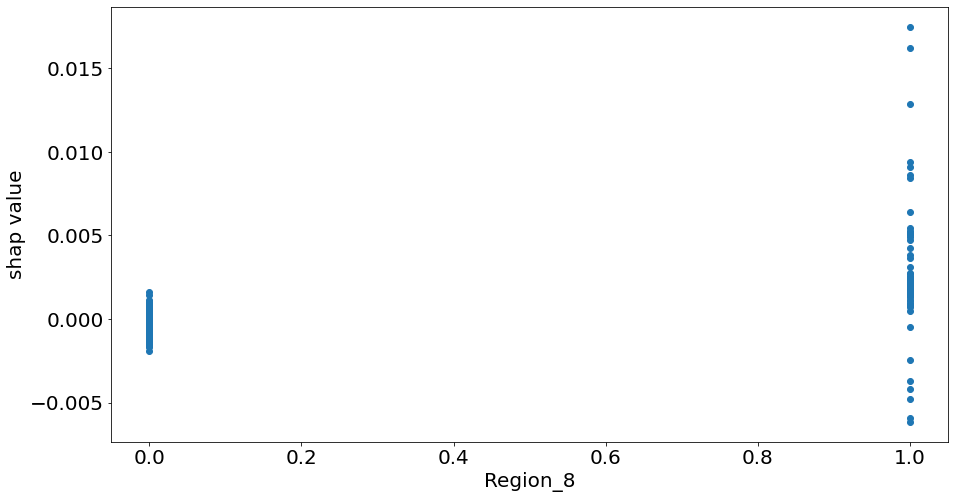

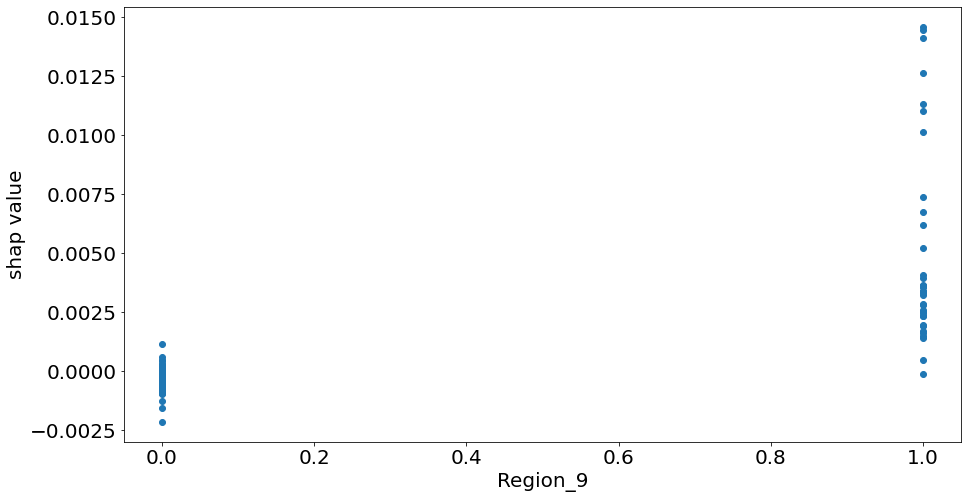

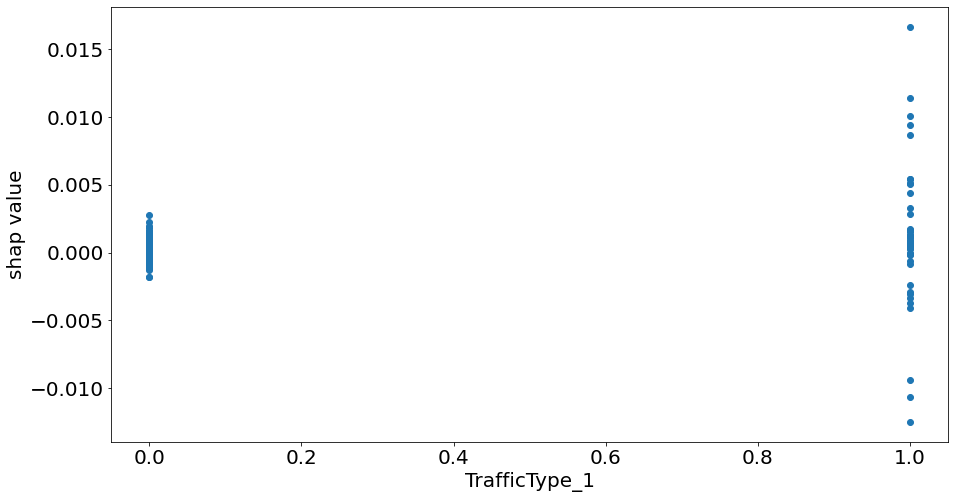

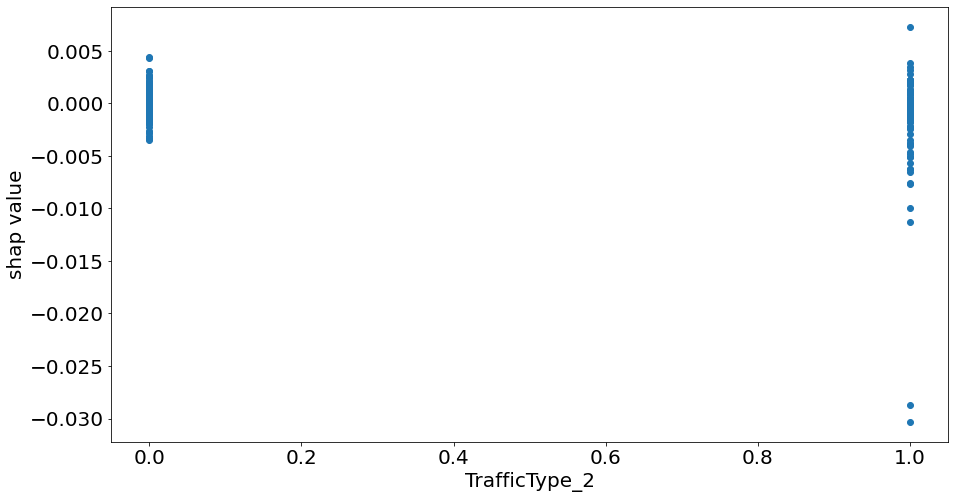

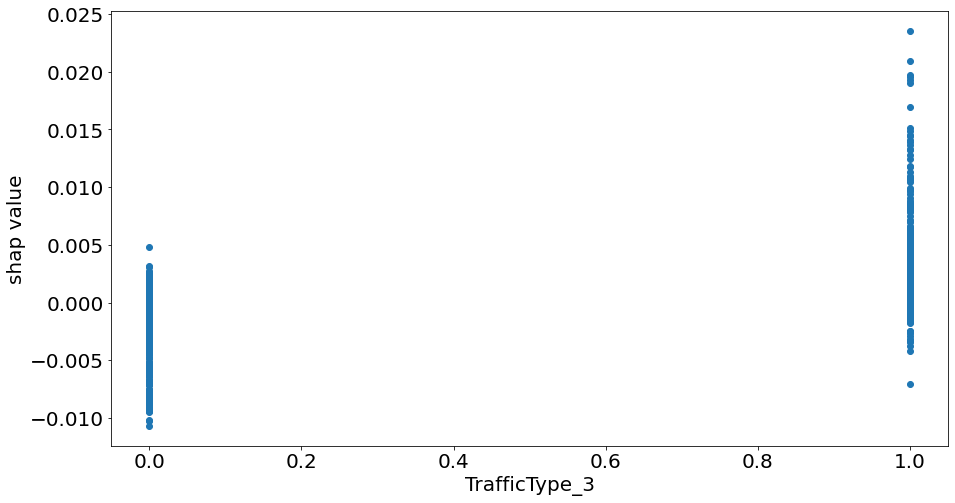

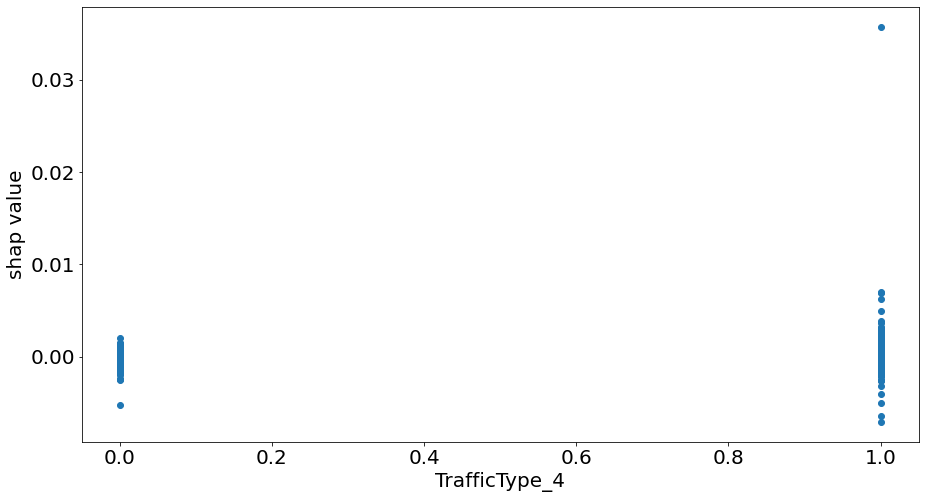

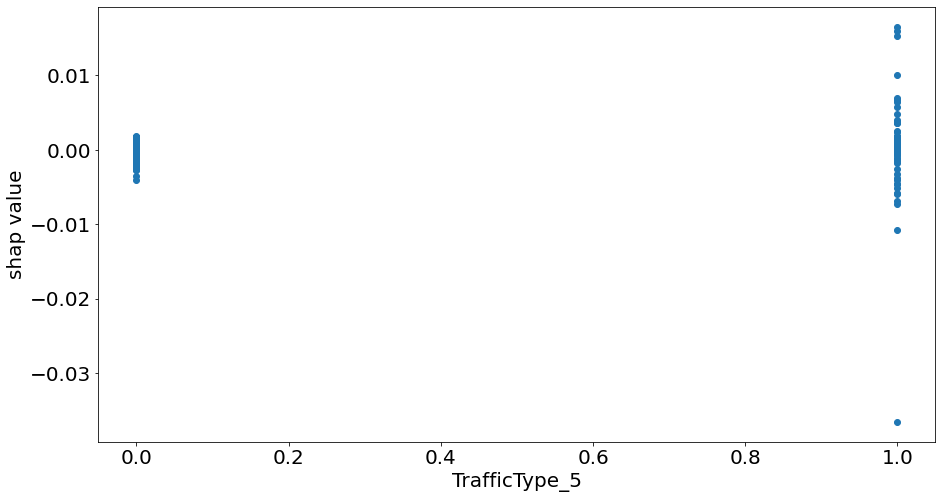

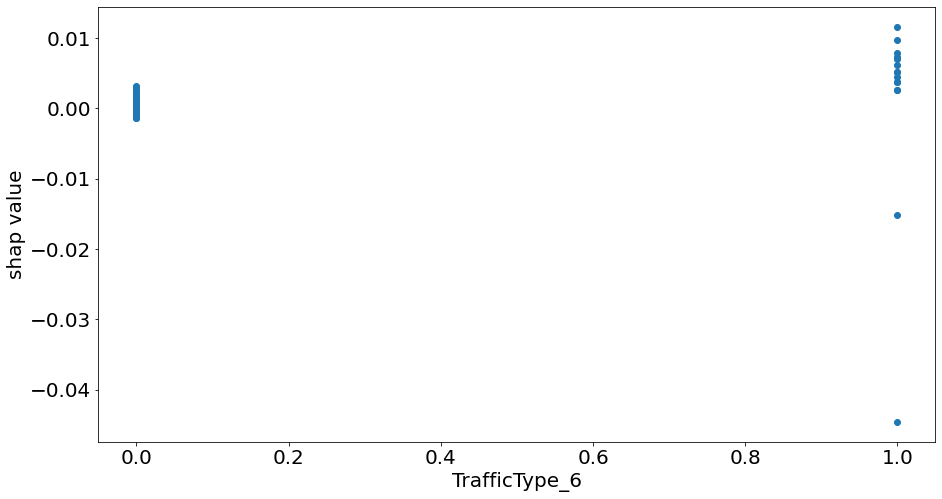

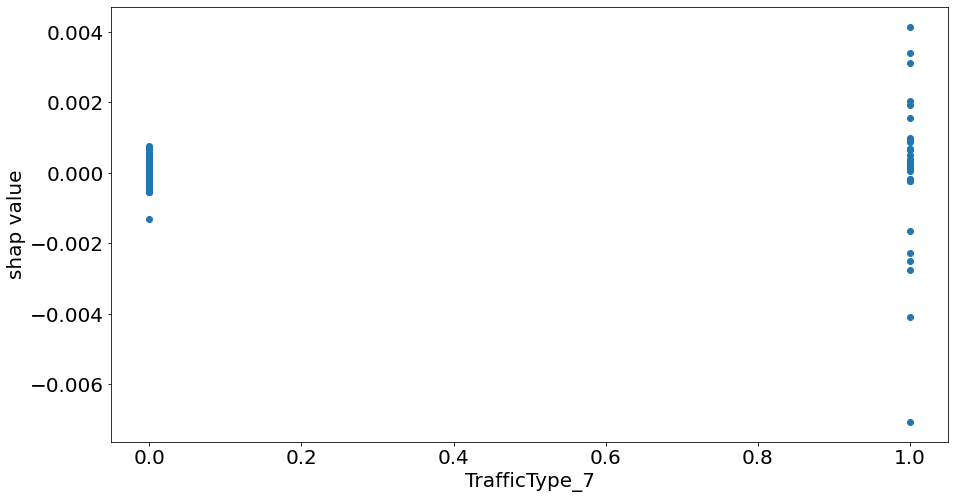

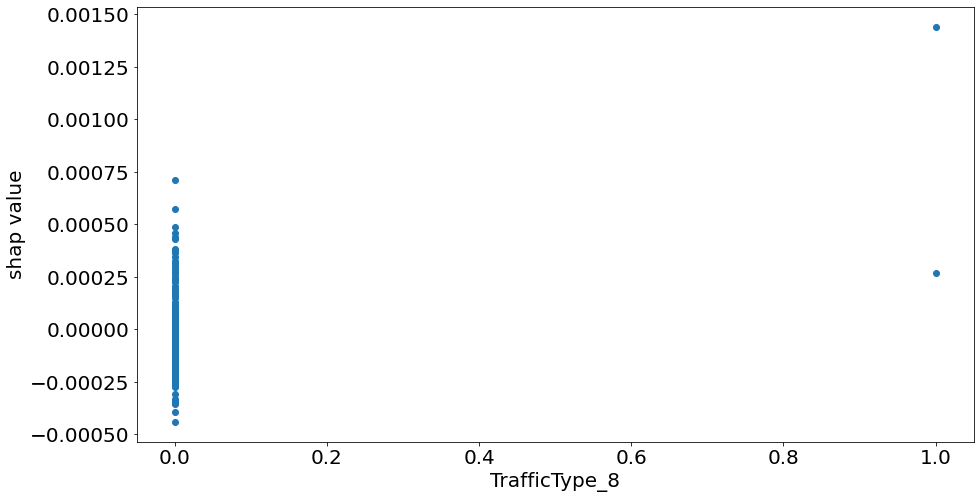

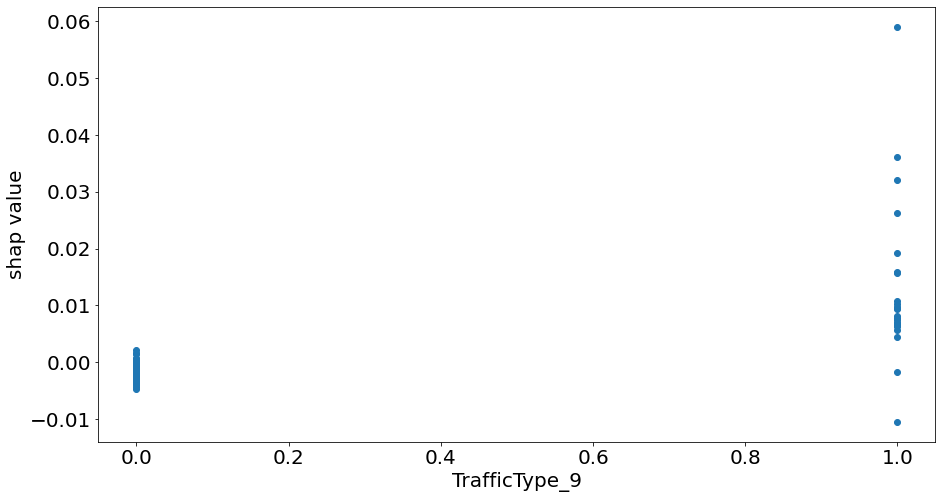

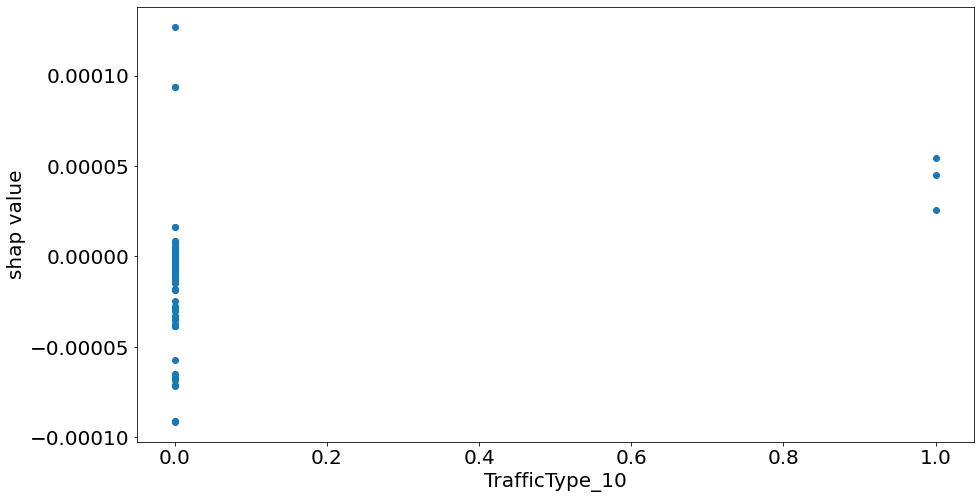

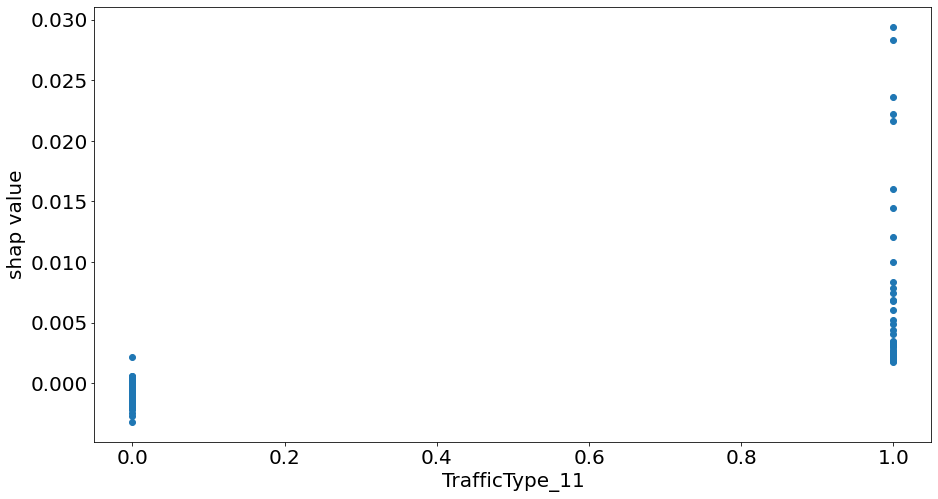

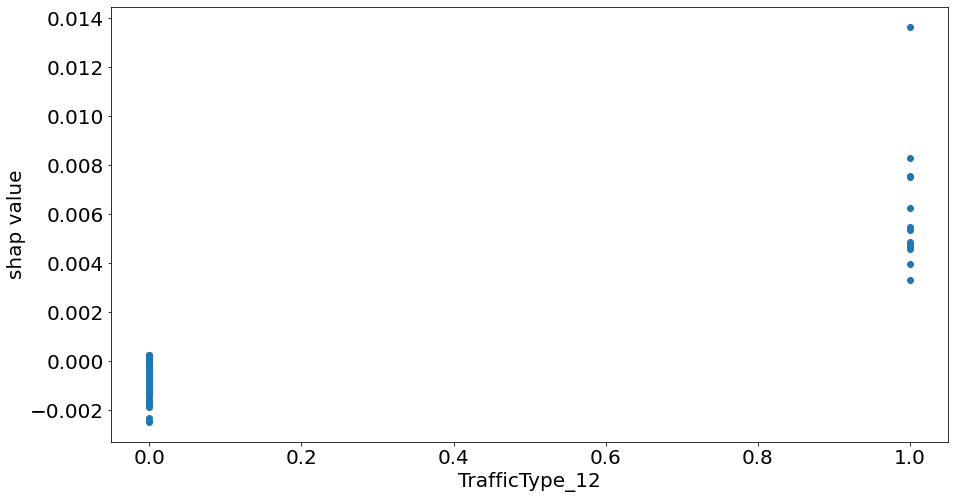

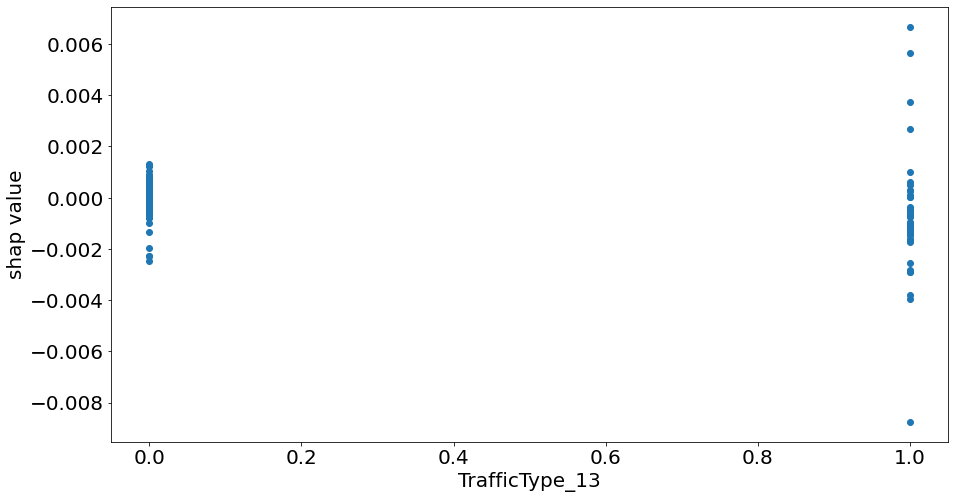

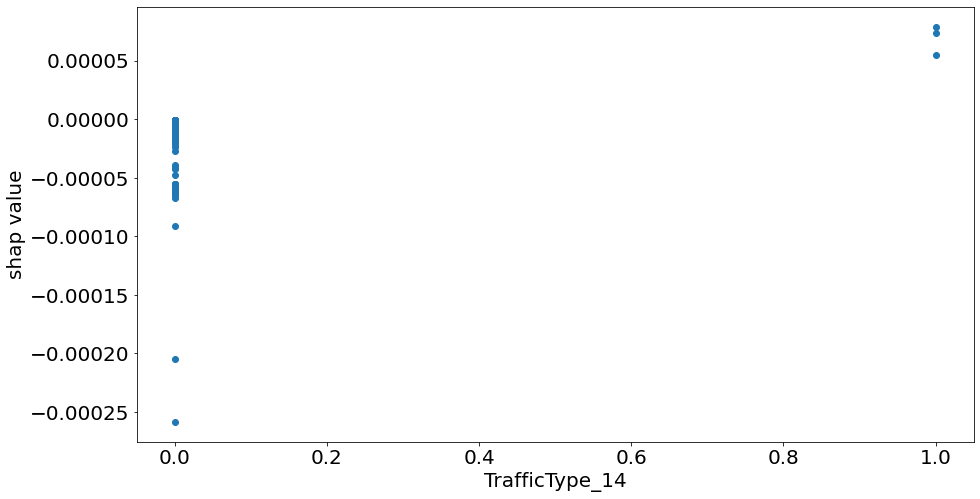

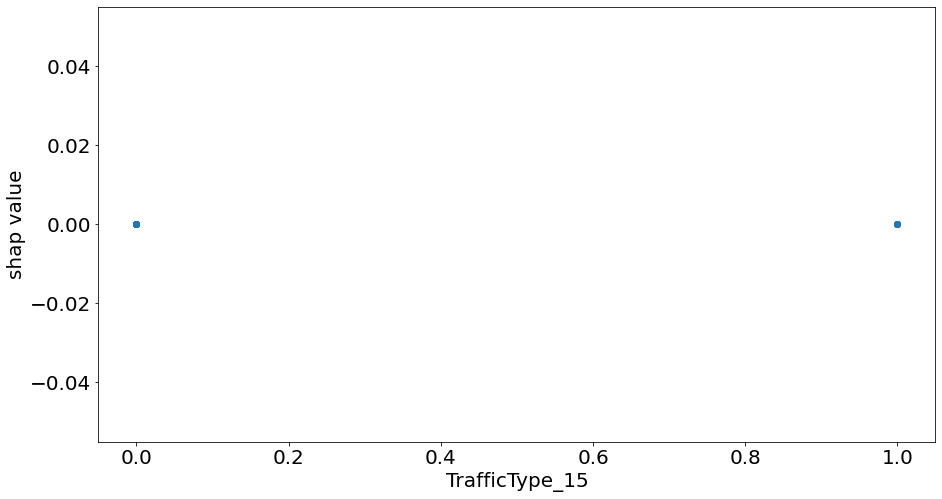

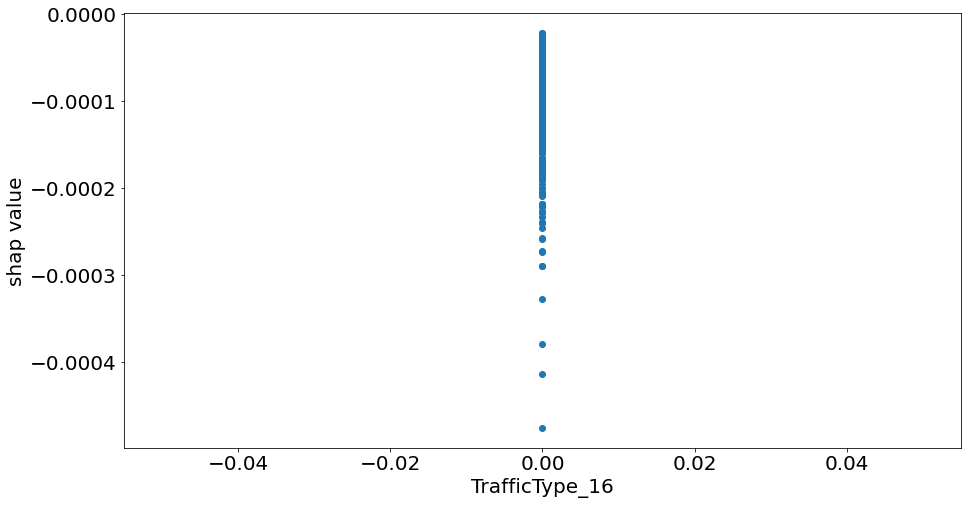

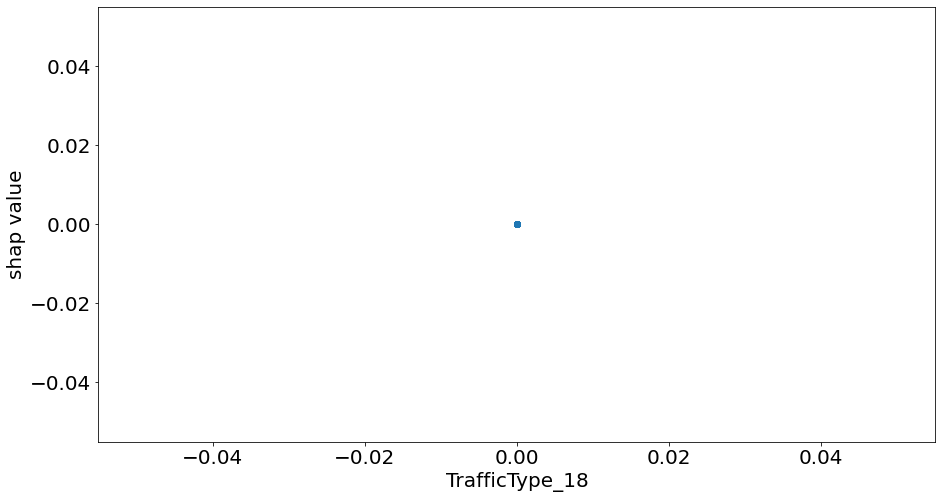

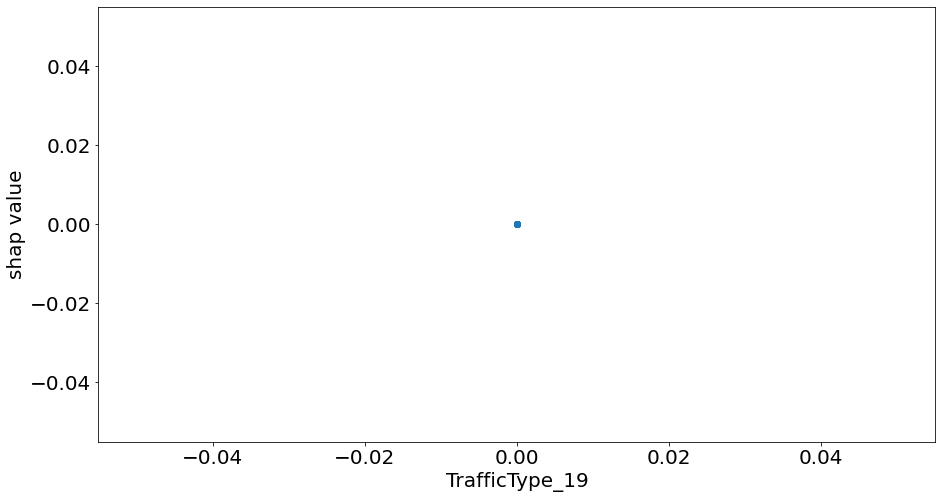

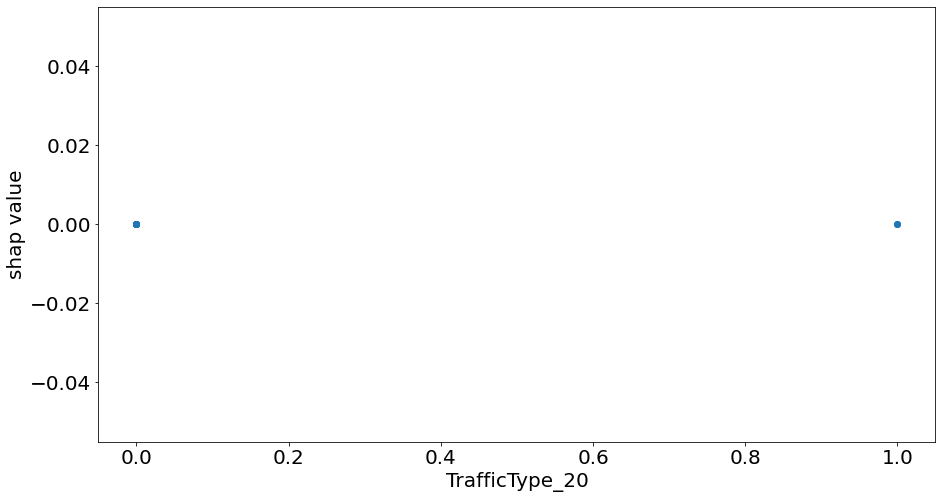

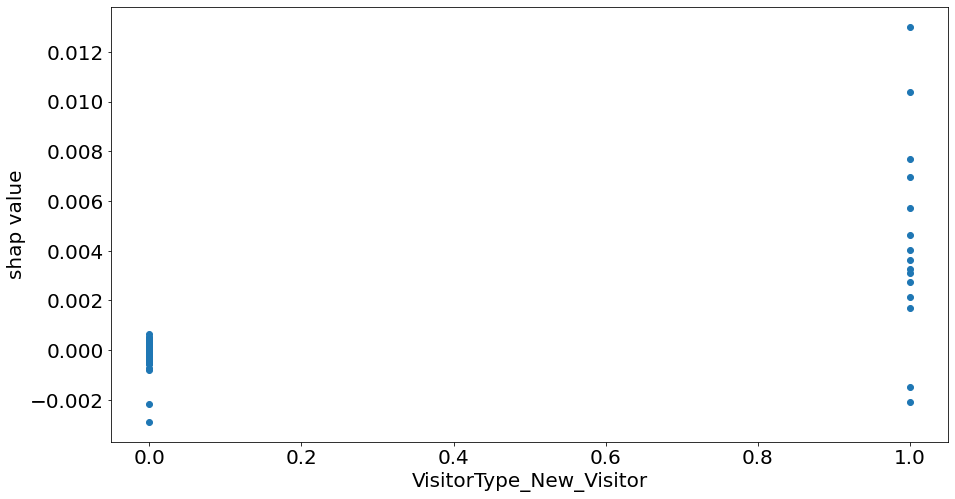

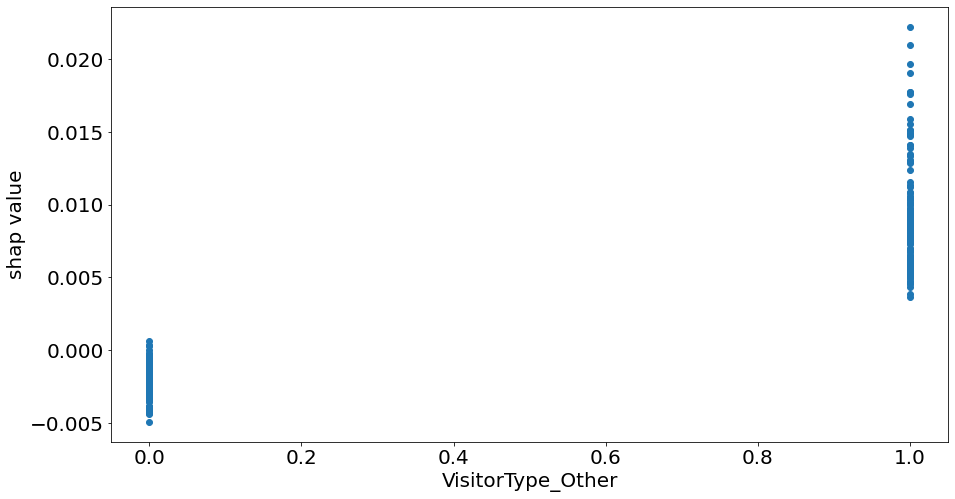

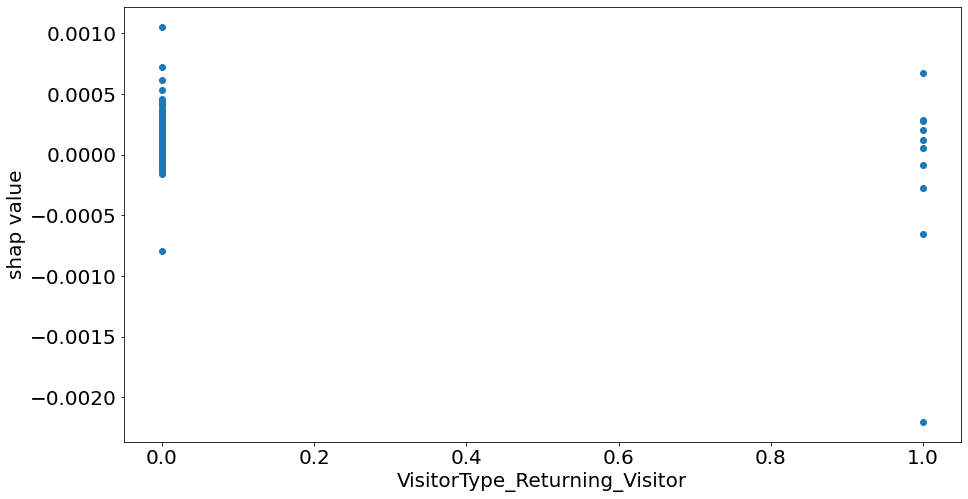

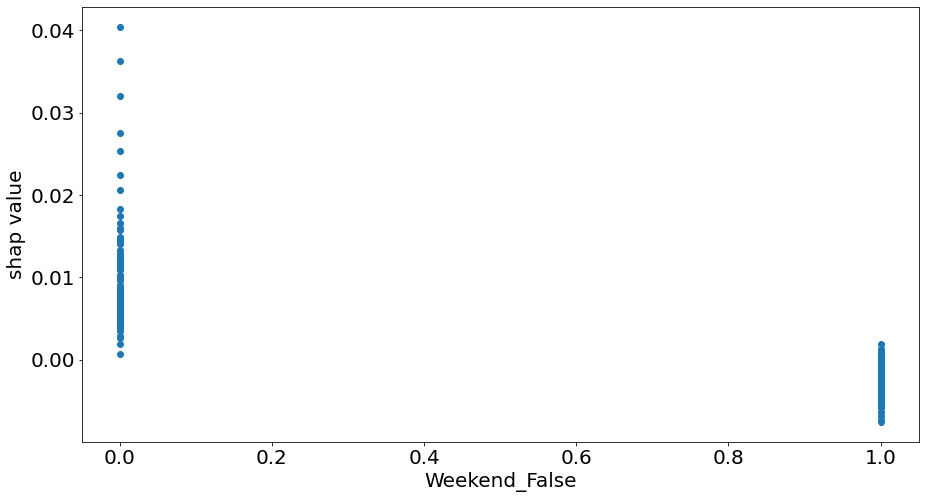

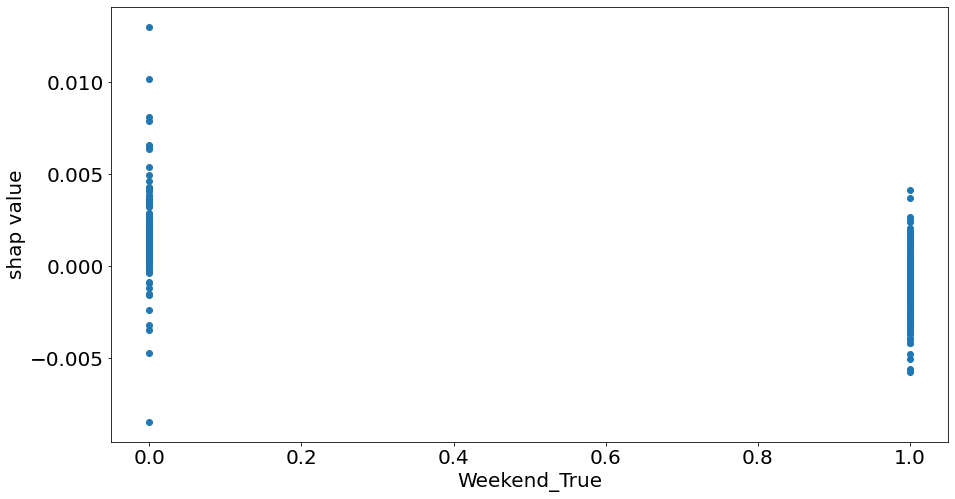

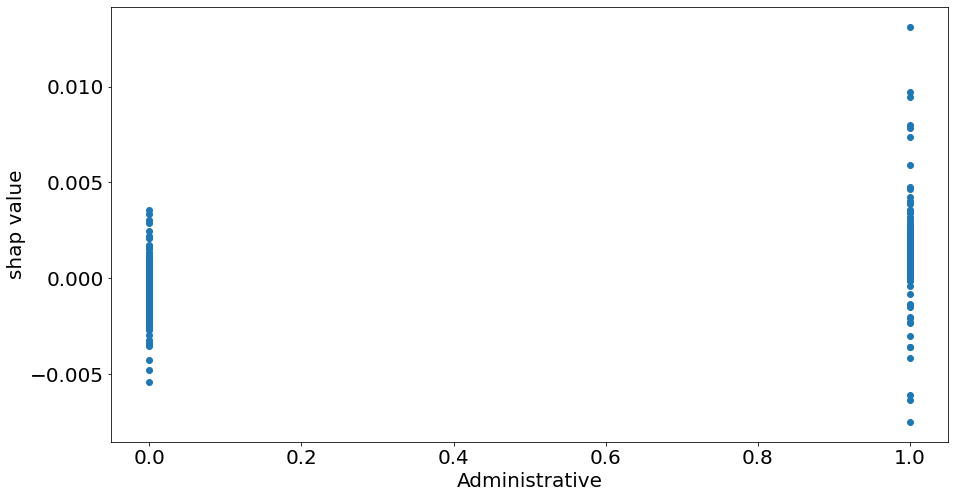

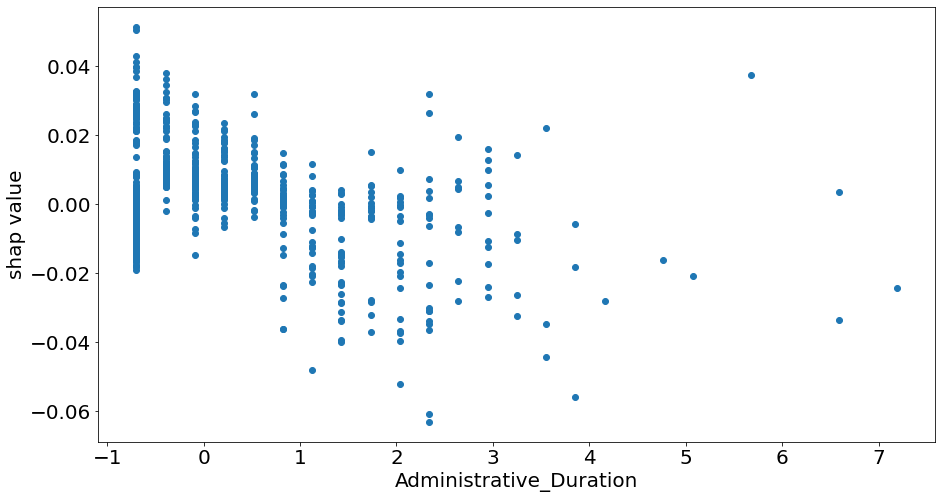

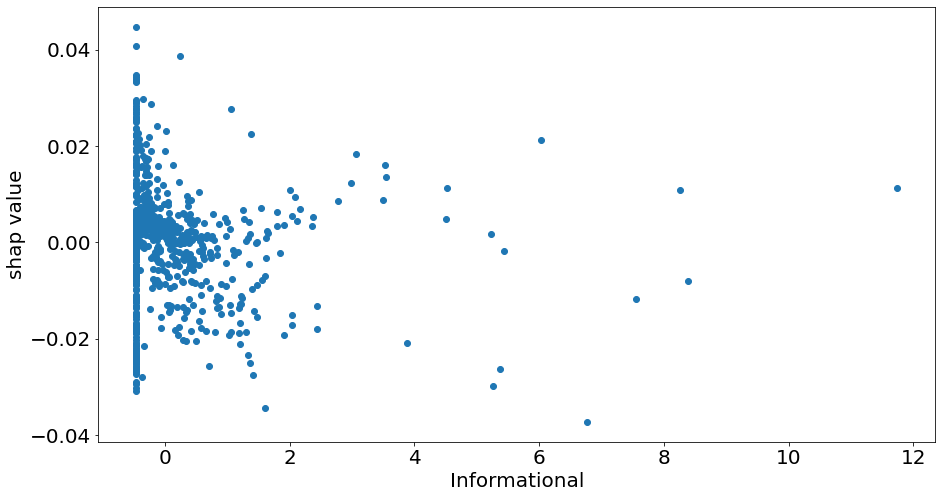

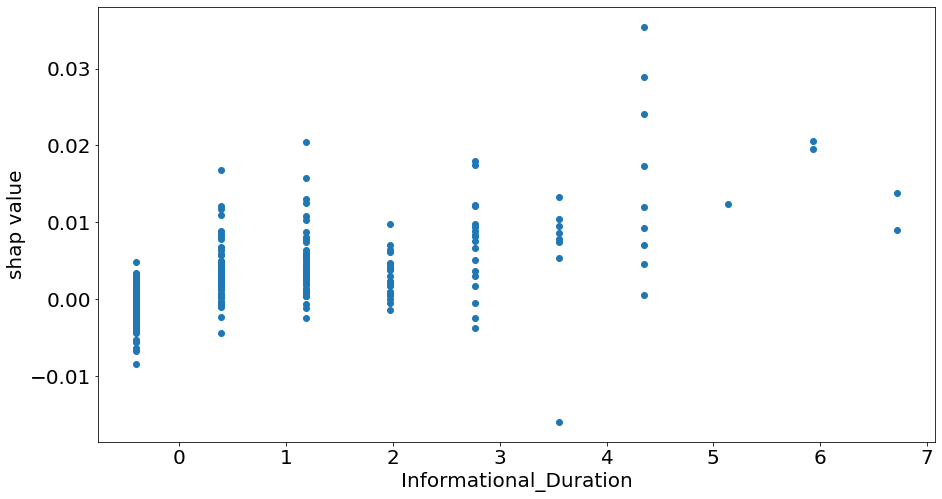

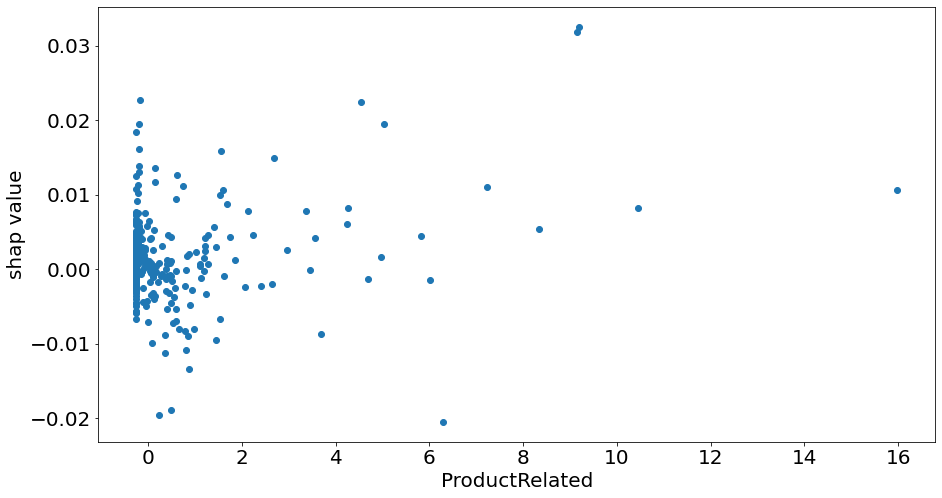

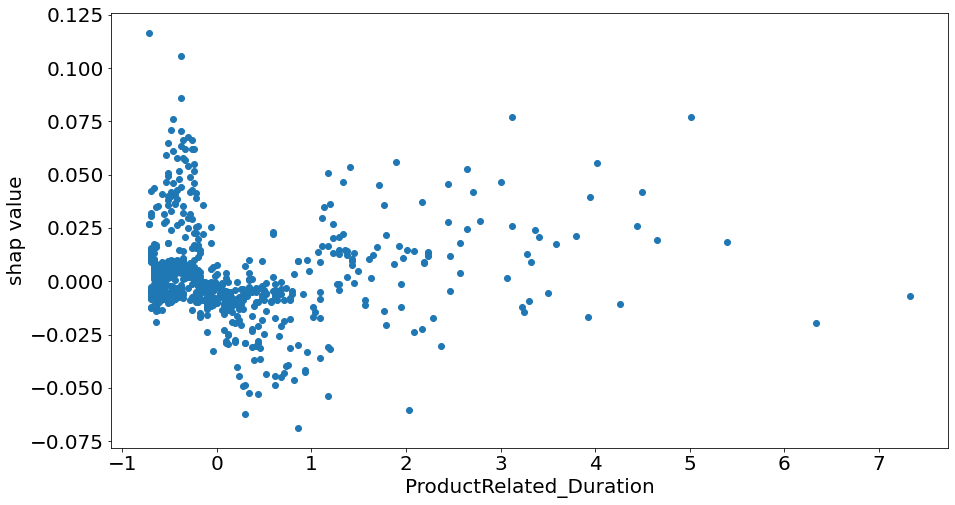

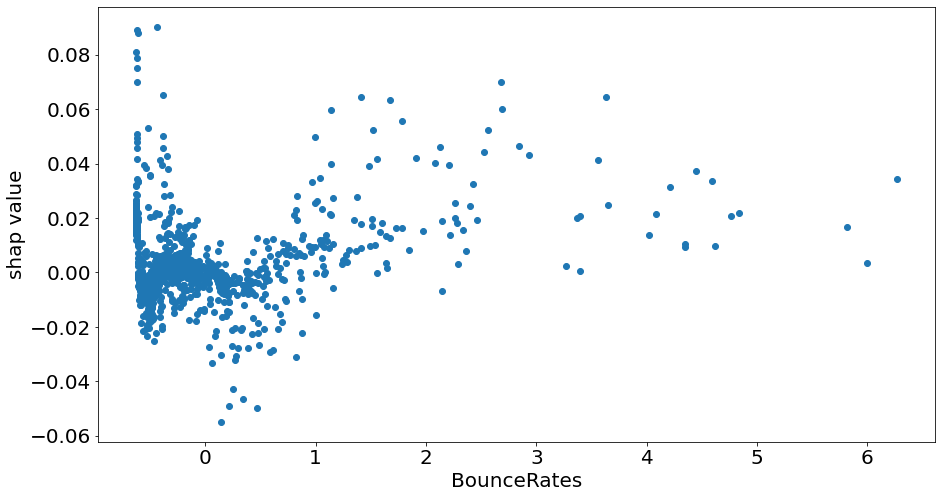

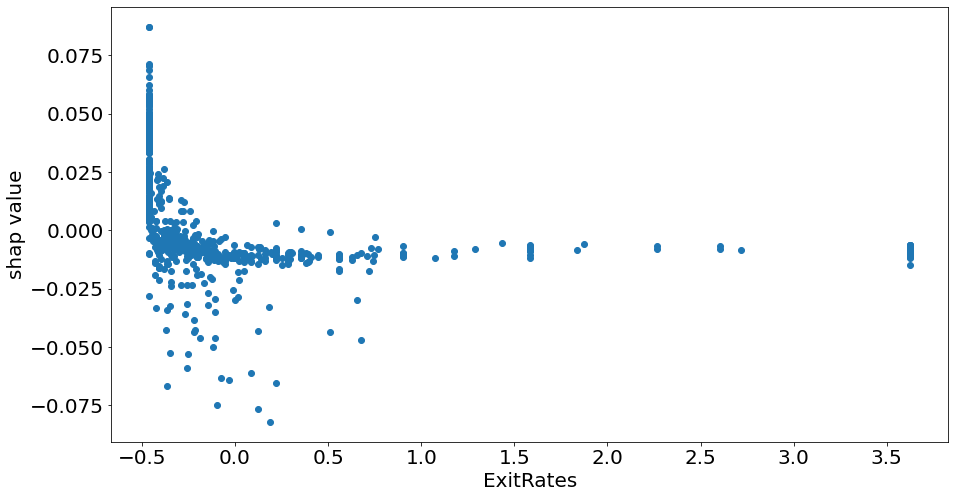

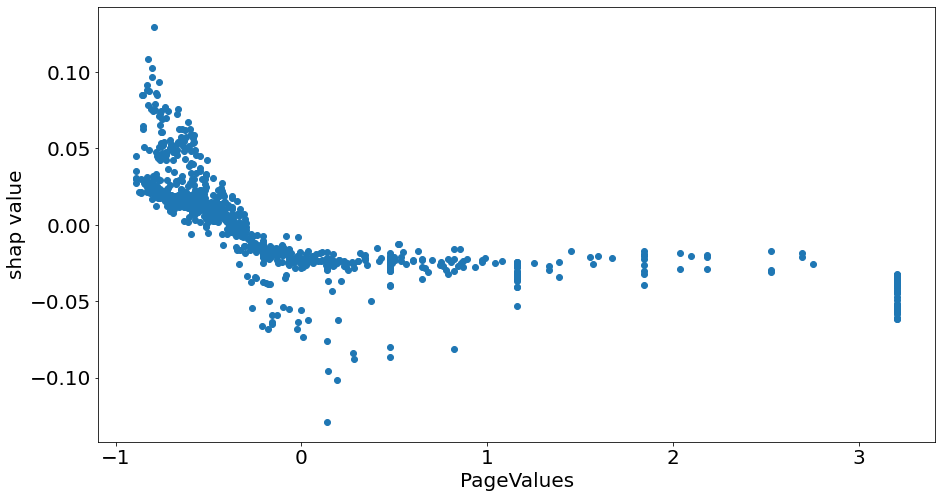

In [97]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
# change the format of the feature names that has a dot
for i in range(6):
    feature_names[i] = feature_names[i].replace('.','_')
    #print(feature_names[i])
for ftr in feature_names:
    
    indx = feature_names.index(ftr)
    plt.figure(figsize=(15,8))
    plt.scatter(X_test_transformed[:1000,indx],shap_values[1][:,indx])
    plt.ylabel('shap value')
    plt.xlabel(ftr)
    plt.savefig("../figures/shapvalue/"+ftr, dpi = 300)
    plt.show()